## Download Data

In [1]:
!gdown 1PXrAfRBNc6NuLfVeybpMp8lvps0LPIk8

Downloading...
From: https://drive.google.com/uc?id=1PXrAfRBNc6NuLfVeybpMp8lvps0LPIk8
To: /content/Data_Annotations.zip
100% 35.1M/35.1M [00:00<00:00, 128MB/s]


In [2]:
!gdown 10wqmwdSvoQHqw1kEL7pg33XBJ3ltVq_B

Downloading...
From: https://drive.google.com/uc?id=10wqmwdSvoQHqw1kEL7pg33XBJ3ltVq_B
To: /content/seg_data.zip
100% 46.1M/46.1M [00:00<00:00, 126MB/s]


In [3]:
!unzip Data_Annotations.zip

Archive:  Data_Annotations.zip
   creating: Data_Annotations/
  inflating: __MACOSX/._Data_Annotations  
  inflating: Data_Annotations/classes.txt  
  inflating: __MACOSX/Data_Annotations/._classes.txt  
  inflating: Data_Annotations/.DS_Store  
  inflating: __MACOSX/Data_Annotations/._.DS_Store  
   creating: Data_Annotations/images/
  inflating: __MACOSX/Data_Annotations/._images  
   creating: Data_Annotations/labels/
  inflating: __MACOSX/Data_Annotations/._labels  
  inflating: Data_Annotations/notes.json  
  inflating: __MACOSX/Data_Annotations/._notes.json  
  inflating: Data_Annotations/images/4f9db4e3-CLEMONS_-_2022_-_04-04_1_010.png  
  inflating: __MACOSX/Data_Annotations/images/._4f9db4e3-CLEMONS_-_2022_-_04-04_1_010.png  
  inflating: Data_Annotations/images/c13b4d59-AMMERAAL_-_2022_-_03-07_007.png  
  inflating: __MACOSX/Data_Annotations/images/._c13b4d59-AMMERAAL_-_2022_-_03-07_007.png  
  inflating: Data_Annotations/images/6d495bfe-6730_Alward_DR_002.png  
  inflating: 

In [4]:
!unzip seg_data

Archive:  seg_data.zip
replace __MACOSX/._Data_Annotations? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._Data_Annotations  
  inflating: Data_Annotations/classes.txt  
  inflating: __MACOSX/Data_Annotations/._classes.txt  
  inflating: Data_Annotations/.DS_Store  
  inflating: __MACOSX/Data_Annotations/._.DS_Store  
  inflating: __MACOSX/Data_Annotations/._images  
  inflating: __MACOSX/Data_Annotations/._labels  
  inflating: Data_Annotations/notes.json  
  inflating: __MACOSX/Data_Annotations/._notes.json  
  inflating: Data_Annotations/images/4f9db4e3-CLEMONS_-_2022_-_04-04_1_010.png  
  inflating: __MACOSX/Data_Annotations/images/._4f9db4e3-CLEMONS_-_2022_-_04-04_1_010.png  
  inflating: Data_Annotations/images/c13b4d59-AMMERAAL_-_2022_-_03-07_007.png  
  inflating: __MACOSX/Data_Annotations/images/._c13b4d59-AMMERAAL_-_2022_-_03-07_007.png  
  inflating: Data_Annotations/images/775e5a25-Andreski_Res_04.24.19_005.png  
  inflating: __MACOSX/Data_Annotations/image

## Data Analysis

In [ ]:
import os

base_path = "Data_Annotations"

Image_dir_path = os.path.join(base_path,"images")
Label_dir_path = os.path.join(base_path,"labels")

Image_paths = sorted(os.listdir(Image_dir_path))
Label_paths = sorted(os.listdir(Label_dir_path))

print("Number of Images : ", len(Image_paths))
print("Number of Labels : ", len(Label_paths))

Number of Images :  75
Number of Labels :  75


In [ ]:
assert [i.split(".txt")[0] for i in Label_paths] == [i.split(".png")[0] for i in Image_paths]

In [ ]:
Image_paths[1], Image_dir_path, Label_paths[1]

('032c696d-VOR_103_INPUT_DATA3.png',
 'Data_Annotations/images',
 '032c696d-VOR_103_INPUT_DATA3.txt')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Label_IDS_dict = {}
Label_Coordinates = {}

def get_masks(sample_idx):
  sample_image = cv2.imread(os.path.join(Image_dir_path,Image_paths[sample_idx]))

  Label_IDS = []
  Label_Coordinates = []

  with open(os.path.join(Label_dir_path,Label_paths[sample_idx])) as f:
    lines = f.readlines()
    for line in lines:
      nums = line.split(" ")
      class_label = nums[0]
      class_coordinates = np.array(nums[1:]).reshape((-1,2))
      Label_IDS.append(class_label)
      Label_Coordinates.append(class_coordinates.astype(np.float64))

  for i in range(len(Label_Coordinates)):

    Label_Coordinates[i][:, 0] = (Label_Coordinates[i][:, 0]*sample_image.shape[1]).astype(np.int32)
    Label_Coordinates[i][:, 1] = (Label_Coordinates[i][:, 1]*sample_image.shape[0]).astype(np.int32)

  Label_IDS_dict[Image_paths[sample_idx]] = {
      "Label_IDS" : Label_IDS,
      "Label_Coordinates" : Label_Coordinates
  }

  plt.figure(figsize=(30,20))
  plt.imshow(sample_image)
  for i in range(len(Label_Coordinates)):

    plt.scatter(Label_Coordinates[i][:,0], Label_Coordinates[i][:,1])

  plt.axis('off')
  plt.savefig(os.path.join("Masks",Image_paths[sample_idx]))
  plt.close()

In [ ]:
try:
  os.mkdir("Masks")
except:
  print("Folder Exists!!")

In [ ]:
for k in range(1, len(Label_paths)):
  get_masks(k)

In [ ]:
!zip -r Masks.zip Masks

  adding: Masks/ (stored 0%)
  adding: Masks/90ce193b-Armock_08-21_004.png (deflated 15%)
  adding: Masks/36389b64-Plan_-_The_Davis_Residence_20190328_2_008.png (deflated 8%)
  adding: Masks/801619c2-Duplex_INPUT_DATA2.png (deflated 13%)
  adding: Masks/9f24e5c8-Duplex_004.png (deflated 13%)
  adding: Masks/c13eabe2-Swing_9_-_Final_CDs_-_TP_-_4.14.22_005.png (deflated 16%)
  adding: Masks/03896a96-1656530993308_MILLMIER_-_2022_-_06-29_008.png (deflated 16%)
  adding: Masks/9b542ab3-6716_Alward_DR_R_002.png (deflated 18%)
  adding: Masks/7978fee7-Armock_08-21_005.png (deflated 17%)
  adding: Masks/cbb87cc4-Plan_-_The_Baxter_Residence_20190325_1_006.png (deflated 8%)
  adding: Masks/7a354a7a-6730_Alward_DR_004.png (deflated 20%)
  adding: Masks/775e5a25-Andreski_Res_04.24.19_005.png (deflated 16%)
  adding: Masks/4f9db4e3-CLEMONS_-_2022_-_04-04_1_010.png (deflated 13%)
  adding: Masks/032c696d-VOR_103_INPUT_DATA3.png (deflated 17%)
  adding: Masks/dceb8636-84_Cleveland_Plan_004.png (defl

In [ ]:
import pickle

with open("data.pickle","wb") as f:
  pickle.dump(Label_IDS_dict, f)

## Label Analysis

In [ ]:
!gdown 165-HMvfTfyc_fNd24f1Q7Lbfbr7FkWA4

Downloading...
From: https://drive.google.com/uc?id=165-HMvfTfyc_fNd24f1Q7Lbfbr7FkWA4
To: /content/data.pickle
100% 218k/218k [00:00<00:00, 97.2MB/s]


In [ ]:
import pickle

with open("data.pickle","rb") as f:
  data_dir = pickle.load(f)

In [ ]:
keys_to_delete = []

for k, v in data_dir.items():
  if(len(v['Label_IDS'])==0 or k == '032c696d-VOR_103_INPUT_DATA3.png'):
    keys_to_delete.append(k)

for k in keys_to_delete:
  del data_dir[k]

In [ ]:
import seaborn as sns

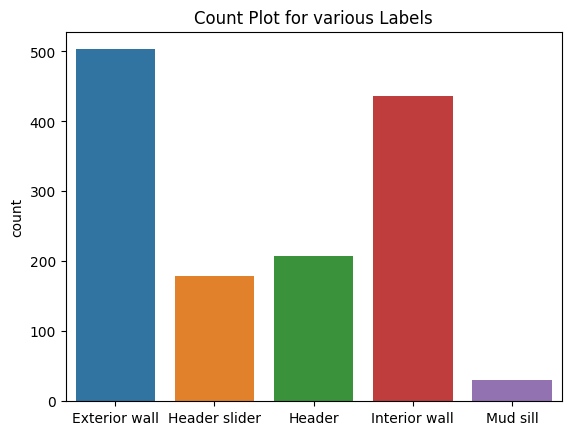

In [ ]:
Label_distribution = []

class_dict = {
    "0" : "Exterior wall",
    "1" : "Header",
    "2" : "Header slider",
    "3" : "Interior wall",
    "4" : "Mud sill"
}

for k,v in data_dir.items():
  Label_distribution.extend([class_dict[l] for l in v['Label_IDS']])

plt.title("Count Plot for various Labels")
sns.countplot(x=Label_distribution)
plt.show()

## Data Preparation

In [ ]:
train_test_ratio = 0.8

print("Total Samples : ", len(data_dir))

train_samples = int(train_test_ratio*len(data_dir))
test_samples = len(data_dir) - train_samples

print("Total Train Samples : ", train_samples)
print("Total Test Samples : ", test_samples)

Total Samples :  54
Total Train Samples :  43
Total Test Samples :  11


In [ ]:
import random

train_string = ""
val_string = ""

for k,v in data_dir.items():
  s = random.uniform(0, 1)
  if(s>=0.2):
    train_string += k + "\n"
  else:
    val_string += k + "\n"

with open("train.txt","w") as f:
  f.write(train_string)

with open("val.txt","w") as f:
  f.write(val_string)

In [ ]:
Label_IDS_dict

{'032c696d-VOR_103_INPUT_DATA3.png': {'Label_IDS': ['0',
   '0',
   '0',
   '0',
   '3',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '3',
   '3',
   '3',
   '3',
   '3',
   '3',
   '3',
   '3',
   '3',
   '3',
   '3',
   '2',
   '2',
   '2',
   '2',
   '1',
   '1',
   '1',
   '1',
   '1',
   '1',
   '2',
   '1',
   '1',
   '1'],
  'Label_Coordinates': [array([[2472., 3868.],
          [2472., 3848.],
          [2295., 3849.],
          [2295., 3749.],
          [2202., 3749.],
          [2202., 3773.],
          [2272., 3771.],
          [2274., 3871.]]),
   array([[1747., 3771.],
          [1747., 3751.],
          [1696., 3750.],
          [1696., 2786.],
          [2276., 2787.],
          [2276., 2766.],
          [1675., 2766.],
          [1671., 3770.]]),
   array([[2273., 2116.],
          [2272., 2623.],
          [2296., 2623.],
          [2296., 2471.],
          [2295., 2451.],
          [2294., 2116.]]),
   array([[2295., 1875.

In [ ]:
import cv2

Label_IDS_dict[Image_paths[2]]
sample_image = cv2.imread(os.path.join(Image_dir_path,Image_paths[2]))
sample_mask = np.zeros_like(sample_image)

for point_id in range(len(Label_IDS_dict[Image_paths[2]]["Label_IDS"])):
  points = (Label_IDS_dict[Image_paths[2]]["Label_Coordinates"][point_id]).astype(np.int32)
  isClosed = True
  color = [np.random.randint(0, 256) for i in range(3)]
  sample_mask = cv2.fillPoly(sample_mask, [points], color)

cv2.imwrite("trial.png", 0.2*sample_mask//1 + 0.8*sample_image//1)

True

## Load the created data

In [5]:
!gdown 1jz6RX0JAm7gqxBUACnLQTTS2iukh08uN # data pickle
!gdown 1_K9Yv95GGKvOwCTfAt83BtDS_dfZ08f1 # train
!gdown 1ZvIDqKSK945Cjt8ny0ittOVerrAA9qLQ # validation

Downloading...
From: https://drive.google.com/uc?id=1jz6RX0JAm7gqxBUACnLQTTS2iukh08uN
To: /content/data_split.pickle
100% 211k/211k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_K9Yv95GGKvOwCTfAt83BtDS_dfZ08f1
To: /content/train.txt
100% 1.85k/1.85k [00:00<00:00, 8.43MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZvIDqKSK945Cjt8ny0ittOVerrAA9qLQ
To: /content/val.txt
100% 477/477 [00:00<00:00, 2.50MB/s]


In [6]:
import torch
import torch.nn as nn
import cv2
import PIL
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
from PIL import Image
import numpy as np

class FloorDataset(Dataset):
  def __init__(self, data_path, split_file_path, data_shape):
    self.image_path = os.path.join(data_path, "images")
    self.label_path = os.path.join(data_path, "labels")

    self.split_file = split_file_path

    self.model_image_height, self.model_image_width = data_shape[0], data_shape[1]
    self.data = []
    self.transforms = transforms.Compose([
          transforms.Resize((self.model_image_width, self.model_image_height)),
          transforms.ToTensor()])
    with open(self.split_file) as f:
        files = f.readlines()
        for line in files:
          self.data.append((os.path.join(self.image_path,line).rstrip(), os.path.join(self.label_path,line.split(".png")[0] + ".txt")))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):

    image_path, label_path = self.data[index]

    image = Image.open(image_path)
    image = image.convert('1')
    image = np.asarray(image)

    image = Image.fromarray(image)

    image_tensor = self.transforms(image)
    # print(image_tensor.shape)

    Label_IDS = {
        '0' : [],
        '1' : [],
        '2' : [],
        '3' : [],
        '4' : []
    }
    Label_Coordinates = []

    with open(label_path) as f:
      lines = f.readlines()
      for line in lines:
        line = line.rstrip()
        nums = line.split(" ")
        class_label = nums[0]
        class_coordinates = np.fromstring(line[1:],dtype=float, sep=' ').reshape((-1,2))
        class_coordinates[:,0] = (class_coordinates[:, 0]*image_tensor.shape[-1]).astype(np.int32)
        class_coordinates[:,1] = (class_coordinates[:, 1]*image_tensor.shape[-2]).astype(np.int32)
        class_coordinates = list(class_coordinates)

        Label_IDS[class_label].extend(class_coordinates)

    tensor_position_0 = torch.zeros([self.model_image_height, self.model_image_width])
    points = np.array(Label_IDS["0"])
    if points.shape[0]!=0:
      tensor_position_0[points[:,1], points[:,0]] = 1
    tensor_position_0 = tensor_position_0.unsqueeze(0)

    tensor_position_1 = torch.zeros([self.model_image_height, self.model_image_width])
    points = np.array(Label_IDS["1"])
    if points.shape[0]!=0:
      tensor_position_1[points[:,1], points[:,0]] = 1
    tensor_position_1 = tensor_position_1.unsqueeze(0)

    tensor_position_2 = torch.zeros([self.model_image_height, self.model_image_width])
    points = np.array(Label_IDS["2"])
    if points.shape[0]!=0:
      tensor_position_2[points[:,1], points[:,0]] = 1
    tensor_position_2 = tensor_position_2.unsqueeze(0)

    tensor_position_3 = torch.zeros([self.model_image_height, self.model_image_width])
    points = np.array(Label_IDS["3"])
    if points.shape[0]!=0:
      tensor_position_3[points[:,1], points[:,0]] = 1
    tensor_position_3 = tensor_position_3.unsqueeze(0)

    tensor_position_4 = torch.zeros([self.model_image_height, self.model_image_width])
    points = np.array(Label_IDS["4"])
    if points.shape[0]!=0:
      tensor_position_4[points[:,1], points[:,0]] = 1
    tensor_position_4 = tensor_position_4.unsqueeze(0)

    label_tensor = torch.concat([tensor_position_0, tensor_position_1, tensor_position_2, tensor_position_3, tensor_position_4], dim=0)

    return image_tensor, label_tensor

train_dataset = FloorDataset(data_path = "/content/Data_Annotations", split_file_path="/content/train.txt", data_shape = (768, 768))
train_loader = DataLoader(train_dataset, batch_size = 1, shuffle=True)

In [ ]:
val_dataset = FloorDataset(data_path = "/content/Data_Annotations", split_file_path="/content/val.txt", data_shape = (768, 768))
val_loader = DataLoader(val_dataset, batch_size = 1, shuffle=True)

## Sanity Check

In [ ]:
import matplotlib.pyplot as plt

for b in train_loader:
  break

I = b[0].detach().numpy()[0,:,:,:].transpose(1,2,0)
S = b[1].detach().numpy()[0,2,:,:]
S = cv2.GaussianBlur(S, (13,13), sigmaX=2)

S_total = np.zeros((768,768,3))
print(S_total.shape, S.shape)
S_total[:,:,0] = S

plt.imshow(S)

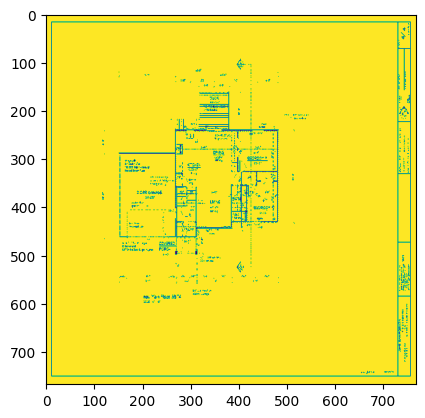

In [ ]:
plt.imshow(I)

Aligned Labels and Images

## Model LK-UNET

In [ ]:
import scipy.stats as st

def get_gaussian_kernel(kernlen=13, nsig=2):
    """Get kernels used for generating Gaussian heatmaps"""
    interval = (2 * nsig + 1.) / kernlen
    x = np.linspace(-nsig - interval / 2., nsig + interval / 2., kernlen + 1)

    kern1d = np.diff(st.norm.cdf(x))

    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw / kernel_raw.sum()
    kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    weight = torch.nn.Parameter(data=kernel, requires_grad=False)
    weight = (weight - weight.min()) / (weight.max() - weight.min())
    return weight

class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-3, p=2, reduction='mean'):
        super(DiceLoss, self).__init__()
        self.smooth = smooth
        self.p = p
        self.reduction = reduction

    def forward(self, predict, target):
        assert predict.shape[0] == target.shape[0], "predict & target batch size don't match"
        predict = predict.contiguous().view(-1)
        target = target.contiguous().view(-1)
        a = torch.mul(predict, target)
        b = predict.pow(self.p) + target.pow(self.p)

        num = 2 * torch.sum(a, dim=0) + self.smooth

        den = torch.sum(b, dim=0) + self.smooth

        loss = 1 - num / den

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        elif self.reduction == 'none':
            return loss
        else:
            raise Exception('Unexpected reduction {}'.format(self.reduction))


def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )

class Segmentation(nn.Module):
    def __init__(self, config=None, device='cuda', n_class=5):
        super().__init__()

        self.PKE_learn = True
        self.relu = torch.nn.PReLU()
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        c1, c2, c3, c4, c5, d1, d2 = 64, 64, 128, 128, 256, 256, 256
        # Shared Encoder.
        self.conv1a = torch.nn.Conv2d(1, c1, kernel_size=3, stride=1, padding=1)
        self.conv1b = torch.nn.Conv2d(c1, c1, kernel_size=3, stride=1, padding=1)

        # LKUNET Block with K = 5

        self.conv2 = torch.nn.Conv2d(c1, c2, kernel_size=3, stride=1, padding=1)

        self.conv2a = torch.nn.Conv2d(c2, c2, kernel_size=1, stride=1, padding=0)
        self.conv2b = torch.nn.Conv2d(c2, c2, kernel_size=3, stride=1, padding=1)
        self.conv2c = torch.nn.Conv2d(c2, c2, kernel_size=5, stride=1, padding=2)


        self.conv3 = torch.nn.Conv2d(c2, c3, kernel_size=3, stride=1, padding=1)

        self.conv3a = torch.nn.Conv2d(c3, c3, kernel_size=1, stride=1, padding=0)
        self.conv3b = torch.nn.Conv2d(c3, c3, kernel_size=3, stride=1, padding=1)
        self.conv3c = torch.nn.Conv2d(c3, c3, kernel_size=5, stride=1, padding=2)

        self.conv4 = torch.nn.Conv2d(c3, c4, kernel_size=3, stride=1, padding=1)

        self.conv4a = torch.nn.Conv2d(c4, c4, kernel_size=1, stride=1, padding=0)
        self.conv4b = torch.nn.Conv2d(c4, c4, kernel_size=3, stride=1, padding=1)
        self.conv4c = torch.nn.Conv2d(c4, c4, kernel_size=5, stride=1, padding=2)

        # Detector Head
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.dconv_up3 = double_conv(c3 + c4, c3)
        self.dconv_up2 = double_conv(c2 + c3, c2)
        self.dconv_up1 = double_conv(c1 + c2, c1)

        self.conv_last = nn.Conv2d(c1, n_class, kernel_size=1)

        # self.dice = DiceLoss()
        # self.kernel = get_gaussian_kernel().to(device)

        self.to(device)

    def forward(self, x):
        #print(x.shape)
        x = self.relu(self.conv1a(x))
        conv1 = self.relu(self.conv1b(x))
        x = self.pool(conv1)

        # LKUNET STARTS
        x = self.relu(self.conv2(x))
        x = x + self.conv2a(x) + self.conv2b(x) + self.conv2c(x)
        conv2 = self.relu(x)
        x = self.pool(conv2)

        x = self.relu(self.conv3(x))
        x = x + self.conv3a(x) + self.conv3b(x) + self.conv3c(x)
        conv3 = self.relu(x)
        x = self.pool(conv3)

        x = self.relu(self.conv4(x))
        x = x + self.conv4a(x) + self.conv4b(x) + self.conv4c(x)
        x = self.relu(x)

        cPa = self.upsample(x)
        cPa = torch.cat([cPa, conv3], dim=1)

        cPa = self.dconv_up3(cPa)
        cPa = self.upsample(cPa)
        cPa = torch.cat([cPa, conv2], dim=1)

        cPa = self.dconv_up2(cPa)
        cPa = self.upsample(cPa)
        cPa = torch.cat([cPa, conv1], dim=1)

        cPa = self.dconv_up1(cPa)

        semi = self.conv_last(cPa)
        semi = torch.sigmoid(semi)

        return semi

In [ ]:
import torch.optim as optim
from tqdm import tqdm

model = Segmentation()
loss_fn = DiceLoss()

optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 200

for epoch in tqdm(range(epochs)):

  train_loss = []
  for batch in train_loader:
    X, Y = batch[0].cuda(), batch[1].cuda()

    model.train()
    optimizer.zero_grad()

    #print("X : ", X.shape)
    y_pred = model(X)
    loss = loss_fn(Y, y_pred)

    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()

  print("Epoch : ", epoch, "Train Dice Loss : ", sum(train_loss)/len(train_loss))

  val_loss = []
  for batch in val_loader:
    X, Y = batch[0].cuda(), batch[1].cuda()

    model.eval()

    with torch.no_grad():
      y_pred = model(X)
      loss = loss_fn(Y, y_pred)

      val_loss.append(loss.item())

  print("Epoch : ", epoch, "Validation Dice Loss : ", sum(val_loss)/len(val_loss))


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch :  0 Train Dice Loss :  0.9997351904248082


  1%|          | 1/100 [00:28<46:24, 28.13s/it]

Epoch :  0 Validation Dice Loss :  0.9994301091540944
Epoch :  1 Train Dice Loss :  0.9967010783594709


  2%|▏         | 2/100 [00:56<46:35, 28.52s/it]

Epoch :  1 Validation Dice Loss :  0.9892110065980391
Epoch :  2 Train Dice Loss :  0.9937510476555935


  3%|▎         | 3/100 [01:24<45:05, 27.89s/it]

Epoch :  2 Validation Dice Loss :  0.9996324940161272
Epoch :  3 Train Dice Loss :  0.9913312529408654


  4%|▍         | 4/100 [01:51<44:32, 27.83s/it]

Epoch :  3 Validation Dice Loss :  0.9952040802348744
Epoch :  4 Train Dice Loss :  0.9849611049474671


  5%|▌         | 5/100 [02:19<43:51, 27.70s/it]

Epoch :  4 Validation Dice Loss :  0.9611218029802496
Epoch :  5 Train Dice Loss :  0.9721563430719597


  6%|▌         | 6/100 [02:47<43:25, 27.72s/it]

Epoch :  5 Validation Dice Loss :  0.9568279710682955
Epoch :  6 Train Dice Loss :  0.9678886352583419


  7%|▋         | 7/100 [03:15<43:09, 27.85s/it]

Epoch :  6 Validation Dice Loss :  0.954952825199474
Epoch :  7 Train Dice Loss :  0.9652390230533688


  8%|▊         | 8/100 [03:43<42:48, 27.92s/it]

Epoch :  7 Validation Dice Loss :  0.9599919535896995
Epoch :  8 Train Dice Loss :  0.9612130592035693


  9%|▉         | 9/100 [04:11<42:30, 28.03s/it]

Epoch :  8 Validation Dice Loss :  0.9382739175449718
Epoch :  9 Train Dice Loss :  0.9542751825133036


 10%|█         | 10/100 [04:40<42:25, 28.28s/it]

Epoch :  9 Validation Dice Loss :  0.9335575537248091
Epoch :  10 Train Dice Loss :  0.9457160428512928


 11%|█         | 11/100 [05:08<42:00, 28.33s/it]

Epoch :  10 Validation Dice Loss :  0.9296527830037203
Epoch :  11 Train Dice Loss :  0.936666397161262


 12%|█▏        | 12/100 [05:36<41:25, 28.25s/it]

Epoch :  11 Validation Dice Loss :  0.9207295287739147
Epoch :  12 Train Dice Loss :  0.9310701628064


 13%|█▎        | 13/100 [06:05<41:00, 28.28s/it]

Epoch :  12 Validation Dice Loss :  0.9159962697462602
Epoch :  13 Train Dice Loss :  0.9245912155439687


 14%|█▍        | 14/100 [06:33<40:21, 28.16s/it]

Epoch :  13 Validation Dice Loss :  0.906172123822299
Epoch :  14 Train Dice Loss :  0.9276966313983119


 15%|█▌        | 15/100 [07:01<39:58, 28.21s/it]

Epoch :  14 Validation Dice Loss :  0.9143117774616588
Epoch :  15 Train Dice Loss :  0.9201402317645938


 16%|█▌        | 16/100 [07:29<39:37, 28.30s/it]

Epoch :  15 Validation Dice Loss :  0.902716105634516
Epoch :  16 Train Dice Loss :  0.9111997041591379


 17%|█▋        | 17/100 [07:58<39:06, 28.27s/it]

Epoch :  16 Validation Dice Loss :  0.8972805955193259
Epoch :  17 Train Dice Loss :  0.9052221525547116


 18%|█▊        | 18/100 [08:26<38:35, 28.23s/it]

Epoch :  17 Validation Dice Loss :  0.8929610252380371
Epoch :  18 Train Dice Loss :  0.904432009818942


 19%|█▉        | 19/100 [08:54<37:58, 28.13s/it]

Epoch :  18 Validation Dice Loss :  0.8976524851538918
Epoch :  19 Train Dice Loss :  0.8902557062548261


 20%|██        | 20/100 [09:22<37:35, 28.19s/it]

Epoch :  19 Validation Dice Loss :  0.8917074745351617
Epoch :  20 Train Dice Loss :  0.8826181029164514


 21%|██        | 21/100 [09:50<37:06, 28.18s/it]

Epoch :  20 Validation Dice Loss :  0.8898341168056835
Epoch :  21 Train Dice Loss :  0.8820519183957299


 22%|██▏       | 22/100 [10:18<36:26, 28.03s/it]

Epoch :  21 Validation Dice Loss :  0.892993152141571
Epoch :  22 Train Dice Loss :  0.8737205100613971


 23%|██▎       | 23/100 [10:46<36:12, 28.22s/it]

Epoch :  22 Validation Dice Loss :  0.8786930712786588
Epoch :  23 Train Dice Loss :  0.8634670307469923


 24%|██▍       | 24/100 [11:14<35:36, 28.12s/it]

Epoch :  23 Validation Dice Loss :  0.8775162480094216
Epoch :  24 Train Dice Loss :  0.8502287892408149


 25%|██▌       | 25/100 [11:43<35:23, 28.31s/it]

Epoch :  24 Validation Dice Loss :  0.8745465278625488
Epoch :  25 Train Dice Loss :  0.8495137386543806


 26%|██▌       | 26/100 [12:12<35:00, 28.39s/it]

Epoch :  25 Validation Dice Loss :  0.8718993447043679
Epoch :  26 Train Dice Loss :  0.8409513429153798


 27%|██▋       | 27/100 [12:40<34:22, 28.25s/it]

Epoch :  26 Validation Dice Loss :  0.8692885962399569
Epoch :  27 Train Dice Loss :  0.8327097435330235


 28%|██▊       | 28/100 [13:08<33:51, 28.21s/it]

Epoch :  27 Validation Dice Loss :  0.8679136633872986
Epoch :  28 Train Dice Loss :  0.832356870174408


 29%|██▉       | 29/100 [13:35<33:12, 28.07s/it]

Epoch :  28 Validation Dice Loss :  0.8701830560510809
Epoch :  29 Train Dice Loss :  0.8167215072831442


 30%|███       | 30/100 [14:04<33:01, 28.31s/it]

Epoch :  29 Validation Dice Loss :  0.8745074597272006
Epoch :  30 Train Dice Loss :  0.824300653712694


 31%|███       | 31/100 [14:33<32:30, 28.27s/it]

Epoch :  30 Validation Dice Loss :  0.8740358948707581
Epoch :  31 Train Dice Loss :  0.8212637596352156


 32%|███▏      | 32/100 [15:01<32:00, 28.25s/it]

Epoch :  31 Validation Dice Loss :  0.8918402032418684
Epoch :  32 Train Dice Loss :  0.7975039163301157


 33%|███▎      | 33/100 [15:28<31:18, 28.04s/it]

Epoch :  32 Validation Dice Loss :  0.87264038215984
Epoch :  33 Train Dice Loss :  0.801343465960303


 34%|███▍      | 34/100 [15:56<30:52, 28.07s/it]

Epoch :  33 Validation Dice Loss :  0.8741670196706598
Epoch :  34 Train Dice Loss :  0.7798852989839953


 35%|███▌      | 35/100 [16:24<30:20, 28.01s/it]

Epoch :  34 Validation Dice Loss :  0.8892457972873341
Epoch :  35 Train Dice Loss :  0.7753779292106628


 36%|███▌      | 36/100 [16:53<30:05, 28.21s/it]

Epoch :  35 Validation Dice Loss :  0.8830711570653048
Epoch :  36 Train Dice Loss :  0.7691701941711958


 37%|███▋      | 37/100 [17:21<29:31, 28.12s/it]

Epoch :  36 Validation Dice Loss :  0.8991652998057279
Epoch :  37 Train Dice Loss :  0.7628668629845907


 38%|███▊      | 38/100 [17:49<29:07, 28.18s/it]

Epoch :  37 Validation Dice Loss :  0.902603956786069
Epoch :  38 Train Dice Loss :  0.791312133156976


 39%|███▉      | 39/100 [18:17<28:32, 28.07s/it]

Epoch :  38 Validation Dice Loss :  0.8756049492142417
Epoch :  39 Train Dice Loss :  0.7620596622311792


 40%|████      | 40/100 [18:45<28:08, 28.14s/it]

Epoch :  39 Validation Dice Loss :  0.8642676364291798
Epoch :  40 Train Dice Loss :  0.7397270576898441


 41%|████      | 41/100 [19:14<27:45, 28.24s/it]

Epoch :  40 Validation Dice Loss :  0.8755850141698663
Epoch :  41 Train Dice Loss :  0.7296139001846313


 42%|████▏     | 42/100 [19:42<27:19, 28.27s/it]

Epoch :  41 Validation Dice Loss :  0.8862803470004689
Epoch :  42 Train Dice Loss :  0.7248895445535349


 43%|████▎     | 43/100 [20:10<26:38, 28.04s/it]

Epoch :  42 Validation Dice Loss :  0.8784883509982716
Epoch :  43 Train Dice Loss :  0.7277601278105448


 44%|████▍     | 44/100 [20:38<26:11, 28.07s/it]

Epoch :  43 Validation Dice Loss :  0.8829964832826094
Epoch :  44 Train Dice Loss :  0.7270038626914801


 45%|████▌     | 45/100 [21:06<25:46, 28.11s/it]

Epoch :  44 Validation Dice Loss :  0.912111526185816
Epoch :  45 Train Dice Loss :  0.7126762035281159


 46%|████▌     | 46/100 [21:33<24:59, 27.76s/it]

Epoch :  45 Validation Dice Loss :  0.8894738825884733
Epoch :  46 Train Dice Loss :  0.6989059157149736


 47%|████▋     | 47/100 [22:00<24:23, 27.62s/it]

Epoch :  46 Validation Dice Loss :  0.8970940654928033
Epoch :  47 Train Dice Loss :  0.6925336843313172


 48%|████▊     | 48/100 [22:27<23:42, 27.36s/it]

Epoch :  47 Validation Dice Loss :  0.8892039277336814
Epoch :  48 Train Dice Loss :  0.6906193148258121


 49%|████▉     | 49/100 [22:54<23:11, 27.29s/it]

Epoch :  48 Validation Dice Loss :  0.9017090363935991
Epoch :  49 Train Dice Loss :  0.6994846393895704


 50%|█████     | 50/100 [23:21<22:38, 27.18s/it]

Epoch :  49 Validation Dice Loss :  0.8859756751493975
Epoch :  50 Train Dice Loss :  0.6825495584066524


 51%|█████     | 51/100 [23:48<22:05, 27.05s/it]

Epoch :  50 Validation Dice Loss :  0.8964425650509921
Epoch :  51 Train Dice Loss :  0.6699251865231713


 52%|█████▏    | 52/100 [24:15<21:44, 27.17s/it]

Epoch :  51 Validation Dice Loss :  0.9078464237126437
Epoch :  52 Train Dice Loss :  0.6735582310099935


 53%|█████▎    | 53/100 [24:42<21:06, 26.95s/it]

Epoch :  52 Validation Dice Loss :  0.8834750869057395
Epoch :  53 Train Dice Loss :  0.667591204476911


 54%|█████▍    | 54/100 [25:09<20:46, 27.10s/it]

Epoch :  53 Validation Dice Loss :  0.8792379606853832
Epoch :  54 Train Dice Loss :  0.6602478124374567


 55%|█████▌    | 55/100 [25:36<20:22, 27.17s/it]

Epoch :  54 Validation Dice Loss :  0.8891557563434948
Epoch :  55 Train Dice Loss :  0.6594464820484782


 56%|█████▌    | 56/100 [26:04<19:59, 27.26s/it]

Epoch :  55 Validation Dice Loss :  0.9105427156795155
Epoch :  56 Train Dice Loss :  0.657454487889312


 57%|█████▋    | 57/100 [26:31<19:34, 27.31s/it]

Epoch :  56 Validation Dice Loss :  0.9241896759379994
Epoch :  57 Train Dice Loss :  0.6494215311006059


 58%|█████▊    | 58/100 [26:59<19:05, 27.28s/it]

Epoch :  57 Validation Dice Loss :  0.9147890426895835
Epoch :  58 Train Dice Loss :  0.6440347308336303


 59%|█████▉    | 59/100 [27:26<18:40, 27.34s/it]

Epoch :  58 Validation Dice Loss :  0.9084588560191068
Epoch :  59 Train Dice Loss :  0.640545224034509


 60%|██████    | 60/100 [27:53<18:11, 27.29s/it]

Epoch :  59 Validation Dice Loss :  0.8893431533466686
Epoch :  60 Train Dice Loss :  0.6395346245100332


 61%|██████    | 61/100 [28:21<17:46, 27.34s/it]

Epoch :  60 Validation Dice Loss :  0.921699502251365
Epoch :  61 Train Dice Loss :  0.6373046927673872


 62%|██████▏   | 62/100 [28:48<17:13, 27.21s/it]

Epoch :  61 Validation Dice Loss :  0.9163059212944724
Epoch :  62 Train Dice Loss :  0.6335304628971011


 63%|██████▎   | 63/100 [29:14<16:41, 27.07s/it]

Epoch :  62 Validation Dice Loss :  0.9135558659380133
Epoch :  63 Train Dice Loss :  0.6287502521692321


 64%|██████▍   | 64/100 [29:41<16:13, 27.03s/it]

Epoch :  63 Validation Dice Loss :  0.915112392468886
Epoch :  64 Train Dice Loss :  0.6368499522985414


 65%|██████▌   | 65/100 [30:08<15:46, 27.04s/it]

Epoch :  64 Validation Dice Loss :  0.8934667977419767
Epoch :  65 Train Dice Loss :  0.6287033807399661


 66%|██████▌   | 66/100 [30:36<15:22, 27.13s/it]

Epoch :  65 Validation Dice Loss :  0.9165717417543585
Epoch :  66 Train Dice Loss :  0.6252238916796308


 67%|██████▋   | 67/100 [31:03<14:55, 27.14s/it]

Epoch :  66 Validation Dice Loss :  0.9034442197192799
Epoch :  67 Train Dice Loss :  0.6177986361259638


 68%|██████▊   | 68/100 [31:30<14:30, 27.21s/it]

Epoch :  67 Validation Dice Loss :  0.9056742462244901
Epoch :  68 Train Dice Loss :  0.6184644477311955


 69%|██████▉   | 69/100 [31:57<14:00, 27.11s/it]

Epoch :  68 Validation Dice Loss :  0.9209689931436018
Epoch :  69 Train Dice Loss :  0.6116138793701349


 70%|███████   | 70/100 [32:26<13:46, 27.54s/it]

Epoch :  69 Validation Dice Loss :  0.9227154471657493
Epoch :  70 Train Dice Loss :  0.6120177909385326


 71%|███████   | 71/100 [32:52<13:12, 27.32s/it]

Epoch :  70 Validation Dice Loss :  0.9093648357824846
Epoch :  71 Train Dice Loss :  0.6072040352710458


 72%|███████▏  | 72/100 [33:19<12:41, 27.18s/it]

Epoch :  71 Validation Dice Loss :  0.9176404042677446
Epoch :  72 Train Dice Loss :  0.604329010774923


 73%|███████▎  | 73/100 [33:46<12:14, 27.21s/it]

Epoch :  72 Validation Dice Loss :  0.9118348576805808
Epoch :  73 Train Dice Loss :  0.5978589501491812


 74%|███████▍  | 74/100 [34:14<11:47, 27.22s/it]

Epoch :  73 Validation Dice Loss :  0.9266235015609048
Epoch :  74 Train Dice Loss :  0.5986905901931053


 75%|███████▌  | 75/100 [34:41<11:24, 27.37s/it]

Epoch :  74 Validation Dice Loss :  0.9328192689202048
Epoch :  75 Train Dice Loss :  0.6151825868806173


 76%|███████▌  | 76/100 [35:08<10:51, 27.16s/it]

Epoch :  75 Validation Dice Loss :  0.9260019280693748
Epoch :  76 Train Dice Loss :  0.6097878439481869


 77%|███████▋  | 77/100 [35:35<10:24, 27.16s/it]

Epoch :  76 Validation Dice Loss :  0.9207636605609547
Epoch :  77 Train Dice Loss :  0.6078831830690073


 78%|███████▊  | 78/100 [36:02<09:55, 27.06s/it]

Epoch :  77 Validation Dice Loss :  0.930106368931857
Epoch :  78 Train Dice Loss :  0.60282332814017


 79%|███████▉  | 79/100 [36:29<09:28, 27.05s/it]

Epoch :  78 Validation Dice Loss :  0.9242687008597634
Epoch :  79 Train Dice Loss :  0.5962534837944563


 80%|████████  | 80/100 [36:57<09:04, 27.24s/it]

Epoch :  79 Validation Dice Loss :  0.922063182700764
Epoch :  80 Train Dice Loss :  0.5936779241229213


 81%|████████  | 81/100 [37:24<08:35, 27.11s/it]

Epoch :  80 Validation Dice Loss :  0.9255296317013827
Epoch :  81 Train Dice Loss :  0.5954034245291422


 82%|████████▏ | 82/100 [37:51<08:08, 27.14s/it]

Epoch :  81 Validation Dice Loss :  0.9214445189996199
Epoch :  82 Train Dice Loss :  0.5967287005380143


 83%|████████▎ | 83/100 [38:18<07:40, 27.11s/it]

Epoch :  82 Validation Dice Loss :  0.93766235221516
Epoch :  83 Train Dice Loss :  0.5965932704681574


 84%|████████▍ | 84/100 [38:45<07:14, 27.13s/it]

Epoch :  83 Validation Dice Loss :  0.9290032549337908
Epoch :  84 Train Dice Loss :  0.5949841100116109


 85%|████████▌ | 85/100 [39:12<06:46, 27.11s/it]

Epoch :  84 Validation Dice Loss :  0.9212834726680409
Epoch :  85 Train Dice Loss :  0.5872174321218978


 86%|████████▌ | 86/100 [39:39<06:18, 27.04s/it]

Epoch :  85 Validation Dice Loss :  0.9208545901558616
Epoch :  86 Train Dice Loss :  0.5995470479477284


 87%|████████▋ | 87/100 [40:06<05:51, 27.04s/it]

Epoch :  86 Validation Dice Loss :  0.9388539411804893
Epoch :  87 Train Dice Loss :  0.5882462387861207


 88%|████████▊ | 88/100 [40:33<05:24, 27.03s/it]

Epoch :  87 Validation Dice Loss :  0.9368631948124279
Epoch :  88 Train Dice Loss :  0.5794916582662005


 89%|████████▉ | 89/100 [41:00<04:57, 27.06s/it]

Epoch :  88 Validation Dice Loss :  0.9313537153330717
Epoch :  89 Train Dice Loss :  0.5803093092386112


 90%|█████████ | 90/100 [41:27<04:30, 27.07s/it]

Epoch :  89 Validation Dice Loss :  0.9348523237488486
Epoch :  90 Train Dice Loss :  0.5749603163364322


 91%|█████████ | 91/100 [41:54<04:03, 27.01s/it]

Epoch :  90 Validation Dice Loss :  0.9383906722068787
Epoch :  91 Train Dice Loss :  0.5769412462101426


 92%|█████████▏| 92/100 [42:21<03:36, 27.01s/it]

Epoch :  91 Validation Dice Loss :  0.939022112976421
Epoch :  92 Train Dice Loss :  0.5765068766682647


 93%|█████████▎| 93/100 [42:48<03:08, 26.98s/it]

Epoch :  92 Validation Dice Loss :  0.9366864182732322
Epoch :  93 Train Dice Loss :  0.5725163720374884


 94%|█████████▍| 94/100 [43:15<02:42, 27.08s/it]

Epoch :  93 Validation Dice Loss :  0.9290599552067843
Epoch :  94 Train Dice Loss :  0.5817581623099571


 95%|█████████▌| 95/100 [43:42<02:15, 27.08s/it]

Epoch :  94 Validation Dice Loss :  0.9374861933968284
Epoch :  95 Train Dice Loss :  0.5860576671223308


 96%|█████████▌| 96/100 [44:10<01:48, 27.07s/it]

Epoch :  95 Validation Dice Loss :  0.9315371025692333
Epoch :  96 Train Dice Loss :  0.5820265634115352


 97%|█████████▋| 97/100 [44:37<01:21, 27.06s/it]

Epoch :  96 Validation Dice Loss :  0.9352894804694436
Epoch :  97 Train Dice Loss :  0.5781795424084331


 98%|█████████▊| 98/100 [45:04<00:54, 27.06s/it]

Epoch :  97 Validation Dice Loss :  0.9334377483888106
Epoch :  98 Train Dice Loss :  0.5754704461541287


 99%|█████████▉| 99/100 [45:31<00:27, 27.03s/it]

Epoch :  98 Validation Dice Loss :  0.9299553361806002
Epoch :  99 Train Dice Loss :  0.5752406037131021


100%|██████████| 100/100 [45:57<00:00, 27.58s/it]

Epoch :  99 Validation Dice Loss :  0.9336267005313527


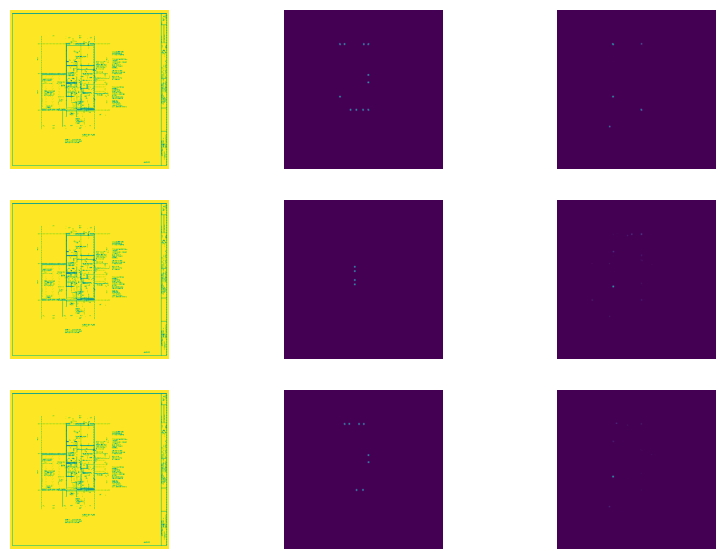

In [ ]:
for b in train_loader:
  break

figure = plt.figure(figsize=(10,7))

figure.add_subplot(3,3,1)
plt.imshow(b[0].detach().numpy()[0,0,:,:])
plt.axis("off")

figure.add_subplot(3,3,2)
plt.imshow(cv2.GaussianBlur(b[1].detach().numpy()[0,0,:,:], (13,13), sigmaX=2))
plt.axis("off")

figure.add_subplot(3,3,3)
plt.imshow((cv2.GaussianBlur(model(b[0].cuda()).cpu().detach().numpy()[0,0,:,:], (13,13), sigmaX=2)))
plt.axis("off")

figure.add_subplot(3,3,4)
plt.imshow(b[0].detach().numpy()[0,0,:,:])
plt.axis("off")

figure.add_subplot(3,3,5)
plt.imshow(cv2.GaussianBlur(b[1].detach().numpy()[0,1,:,:], (13,13), sigmaX=2))
plt.axis("off")

figure.add_subplot(3,3,6)
plt.imshow((cv2.GaussianBlur(model(b[0].cuda()).cpu().detach().numpy()[0,1,:,:], (13,13), sigmaX=2)))
plt.axis("off")

figure.add_subplot(3,3,7)
plt.imshow(b[0].detach().numpy()[0,0,:,:])
plt.axis("off")

figure.add_subplot(3,3,8)
plt.imshow(cv2.GaussianBlur(b[1].detach().numpy()[0,2,:,:], (13,13), sigmaX=2))
plt.axis("off")

figure.add_subplot(3,3,9)
plt.imshow((cv2.GaussianBlur(model(b[0].cuda()).cpu().detach().numpy()[0,2,:,:], (13,13), sigmaX=2)))
plt.axis("off")
plt.show()

## Segmentation with Mask as output

In [7]:
import os

images = os.listdir("Data_Annotations/images")

with open("train.txt", "w") as f:
  for i in range(int(0.8*len(images))):
    f.write(images[i] + "\n")

with open("val.txt", "w") as f:
  for i in range(len(images) - int(0.8*len(images))):
    f.write(images[i] + "\n")

In [8]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [9]:
import torch
import torch.nn as nn
import cv2
import PIL
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
from PIL import Image
import numpy as np

class FloorDatasetMask(Dataset):
  def __init__(self, data_path, split_file_path, data_shape, num_class, is_train):
    self.image_path = os.path.join(data_path, "images")
    self.label_path = os.path.join(data_path, "labels")

    self.split_file = split_file_path
    self.num_class = num_class
    self.model_image_height, self.model_image_width = data_shape[0], data_shape[1]
    self.data = []
    self.train_transform = A.Compose([
        # A.Resize(height=data_shape[0], width=data_shape[1]),
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5, shift_limit_x = [-50/512, 50/512],
                           shift_limit_y = [-30/512, 30/512], rotate_limit=10),
        # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        # ToTensorV2(),
    ])
    self.val_transform = A.Compose([
        # A.Resize(data_shape[0], data_shape[1]),
        # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        # ToTensorV2()
    ])

    self.is_train = is_train
    # self.transforms = transforms.Compose([
    #       transforms.Resize((self.model_image_width, self.model_image_height)),
    #       transforms.ToTensor()])
    with open(self.split_file) as f:
        files = f.readlines()
        for line in files:
          self.data.append((os.path.join(self.image_path,line).rstrip(), os.path.join(self.label_path,line.split(".png")[0] + ".txt")))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):

    image_path, label_path = self.data[index]

    image = cv2.imread(image_path, 0)
    image = cv2.resize(image, (self.model_image_height, self.model_image_width))

        # image = Image.fromarray(image)

    # print(image_tensor.shape)

    masks = np.zeros((self.num_class, self.model_image_height, self.model_image_width))
    # print(masks.shape)
    with open(label_path) as f:
      lines = f.readlines()
      for line in lines:
        line = line.rstrip()
        nums = line.split(" ")
        class_label = nums[0]
        class_coordinates = np.fromstring(line[1:],dtype=float, sep=' ').reshape((-1,2))
        class_coordinates[:,0] = (class_coordinates[:, 0]*self.model_image_width).astype(np.int32)
        class_coordinates[:,1] = (class_coordinates[:, 1]*self.model_image_height).astype(np.int32)

        masks[int(class_label), :, :] = cv2.fillPoly(masks[int(class_label), :, :], [class_coordinates.astype(np.int32)], (255,255,255))


    masks[self.num_class-1, :, :] = 255*np.ones((self.model_image_height, self.model_image_width))
    for i in range(self.num_class-1):
        # print(np.unique(masks[i, :, :], return_counts=True))
        masks[self.num_class-1, :, :] = np.where(masks[i,:,:] == 255.0, 0, masks[self.num_class-1, :, :])
    # print(np.unique(masks[self.num_class-1, :, :], return_counts=True))
    label_tensor = np.zeros((self.model_image_height, self.model_image_width), dtype=np.uint8)
    # label_tensor = masks
    for i in range(self.num_class):
      label_tensor = np.where(masks[i, :, :] == 255, i+1, label_tensor)

    label_tensor = np.where(label_tensor == self.num_class, 0, label_tensor)
    # print(np.unique(label_tensor))
    # label_tensor = label_tensor.reshape((1, label_tensor.shape[0], label_tensor.shape[1]))
    # print(image.shape, label_tensor.shape)
    if self.is_train == True:
      image_tensor = self.train_transform(image=image, mask = label_tensor)
    else:
      image_tensor = self.val_transform(image=image, mask = label_tensor)

    return image_tensor["image"].reshape((1, self.model_image_height, self.model_image_width)), image_tensor["mask"].reshape((1, self.model_image_height, self.model_image_width))

train_dataset = FloorDatasetMask(data_path = "/content/Data_Annotations", split_file_path="/content/train.txt", data_shape = (512, 512), num_class = 6,is_train=True)
train_loader = DataLoader(train_dataset, batch_size = 1, shuffle=True)

val_dataset = FloorDatasetMask(data_path = "/content/Data_Annotations", split_file_path="/content/val.txt", data_shape = (512, 512), num_class = 6, is_train=False)
val_loader = DataLoader(val_dataset, batch_size = 1, shuffle=True)

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512])
(512, 512, 1) [0 1 2 4]


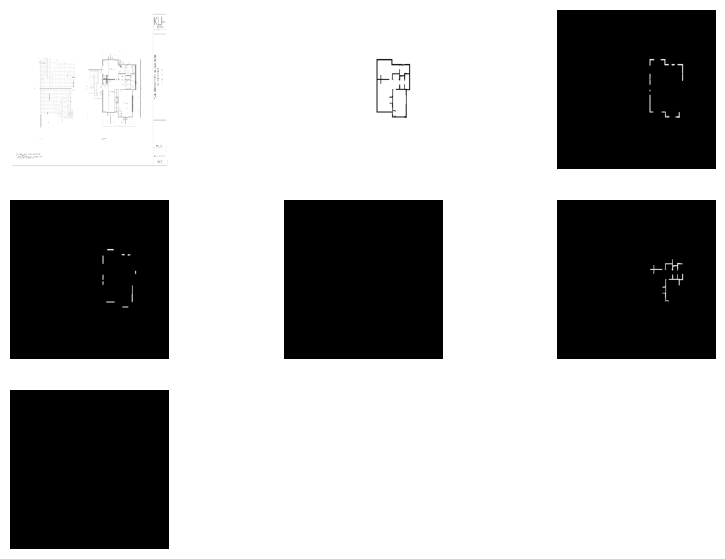

In [10]:
import matplotlib.pyplot as plt

for b in train_loader:
  break

print(b[0].shape, b[1].shape)

I = b[0].detach().numpy()[0,:,:,:].transpose(1,2,0)
S = b[1].detach().numpy()[0,:,:,:].transpose(1,2,0)
print(I.shape, np.unique(S))

figure = plt.figure(figsize=(10,7))

figure.add_subplot(3,3,1)
plt.imshow(I[:,:,:], cmap="gray")
plt.axis("off")

figure.add_subplot(3,3,2)
plt.imshow(np.where(S == 0, 255, 0), cmap="gray")
plt.axis("off")

figure.add_subplot(3,3,3)
plt.imshow(np.where(S == 1, 255, 0), cmap="gray")
plt.axis("off")

figure.add_subplot(3,3,4)
plt.imshow(np.where(S == 2, 255, 0), cmap="gray")
plt.axis("off")

figure.add_subplot(3,3,5)
plt.imshow(np.where(S == 3, 255, 0), cmap="gray")
plt.axis("off")

figure.add_subplot(3,3,6)
plt.imshow(np.where(S == 4, 255, 0), cmap="gray")
plt.axis("off")

figure.add_subplot(3,3,7)
plt.imshow(np.where(S == 5, 255, 0), cmap="gray")
plt.axis("off")
plt.show()
# figure.add_subplot(3,3,2)
# plt.imshow(S[:,:,0], cmap="gray")
# plt.axis("off")

# figure.add_subplot(3,3,3)
# plt.imshow(S[:,:,1], cmap="gray")
# plt.axis("off")

# figure.add_subplot(3,3,4)
# plt.imshow(S[:,:,2], cmap="gray")
# plt.axis("off")

# figure.add_subplot(3,3,5)
# plt.imshow(S[:,:,3], cmap="gray")
# plt.axis("off")

# figure.add_subplot(3,3,6)
# plt.imshow(S[:,:,4], cmap="gray")
# plt.axis("off")

# figure.add_subplot(3,3,7)
# plt.imshow(S[:,:,5], cmap="gray")
# plt.axis("off")
# plt.show()

In [ ]:
np.unique(S[:,:,5], return_counts=True)

(array([0.]), array([589824]))

(768, 768, 3) (768, 768, 1)


(-0.5, 767.5, 767.5, -0.5)

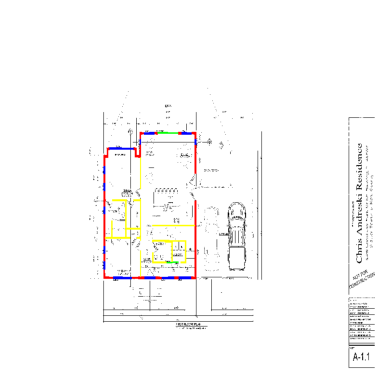

In [ ]:
I_copy = np.repeat(I, 3, axis=-1)

print(I_copy.shape, I.shape)

channel = 255*np.ones_like(I)
no_channel = np.zeros_like(I)

I_colour1 = np.concatenate([channel, no_channel, no_channel], axis=-1)
I_colour2 = np.concatenate([no_channel, no_channel, channel], axis=-1)
I_colour3 = np.concatenate([no_channel, channel, no_channel], axis=-1)
I_colour4 = np.concatenate([channel, channel, no_channel], axis=-1)
I_colour5 = np.concatenate([channel, no_channel, channel], axis=-1)

I_copy = np.where(np.repeat(S[:,:,0].reshape((768,768,1)), 3, axis=-1)==0, I_copy, I_colour1)
I_copy = np.where(np.repeat(S[:,:,1].reshape((768,768,1)), 3, axis=-1)==0, I_copy, I_colour2)
I_copy = np.where(np.repeat(S[:,:,2].reshape((768,768,1)), 3, axis=-1)==0, I_copy, I_colour3)
I_copy = np.where(np.repeat(S[:,:,3].reshape((768,768,1)), 3, axis=-1)==0, I_copy, I_colour4)
I_copy = np.where(np.repeat(S[:,:,4].reshape((768,768,1)), 3, axis=-1)==0, I_copy, I_colour5)

plt.imshow(I_copy)
plt.axis("off")

## Model Training

In [11]:
!pip install segmentation_models_pytorch --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00


In [19]:
train_dataset = FloorDatasetMask(data_path = "/content/Data_Annotations", split_file_path="/content/train.txt", data_shape = (512, 512), num_class = 6,is_train=True)
train_loader = DataLoader(train_dataset, batch_size = 1, shuffle=True)

val_dataset = FloorDatasetMask(data_path = "/content/Data_Annotations", split_file_path="/content/val.txt", data_shape = (512, 512), num_class = 6, is_train=False)
val_loader = DataLoader(val_dataset, batch_size = 1, shuffle=True)

In [13]:
import segmentation_models_pytorch as smp

In [14]:
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['0', '1', '2', '3', '4', '5']
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

model = smp.UnetPlusPlus(
    encoder_name=ENCODER,        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights=ENCODER_WEIGHTS,     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=6,                      # model output channels (number of classes in your dataset)
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 29.9MB/s]


In [15]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
print("Model Params : ", pytorch_total_params)

Model Params :  26073062


In [16]:
import segmentation_models_pytorch as su
from torch.nn import functional as F
loss = su.losses.DiceLoss(mode = "multiclass")
metric = su.losses.JaccardLoss(mode="multiclass")
# metrics = [
#     su.utils.metrics.IoU(threshold=0.5),
# ]

optimizer = torch.optim.Adam([
    dict(params=model.parameters(), lr=0.0001),
])

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 1/50 
Average Train Loss: 0.5715511811865588, IOU : 0.3855560187060954


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


Epoch 1/50 
Average val Loss: 0.6402571002642313, IOU : 0.3126704464356104


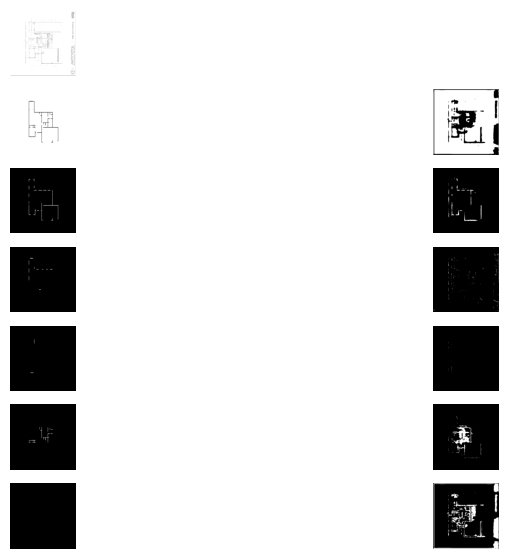

100%|██████████| 59/59 [00:27<00:00,  2.17it/s]


Epoch 2/50 
Average Train Loss: 0.53934468354209, IOU : 0.4146515849535748


100%|██████████| 15/15 [00:06<00:00,  2.42it/s]


Epoch 2/50 
Average val Loss: 0.610057033598423, IOU : 0.34010252853234607


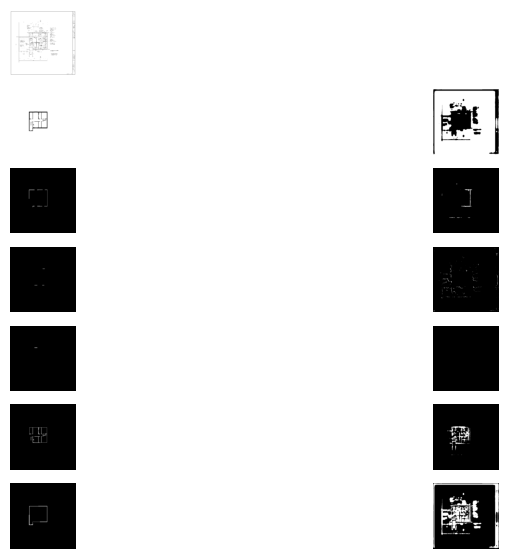

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 3/50 
Average Train Loss: 0.5098429180492284, IOU : 0.4413683474442716


100%|██████████| 15/15 [00:05<00:00,  2.74it/s]


Epoch 3/50 
Average val Loss: 0.5788959299524625, IOU : 0.36873920261859894


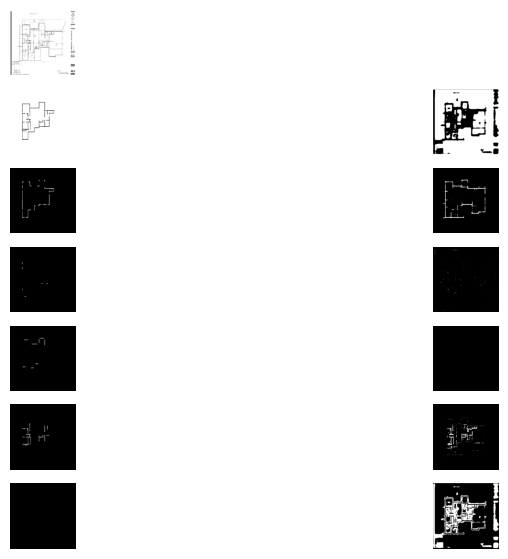

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 4/50 
Average Train Loss: 0.47975187770769756, IOU : 0.4692919193372383


100%|██████████| 15/15 [00:06<00:00,  2.44it/s]


Epoch 4/50 
Average val Loss: 0.5483053098122279, IOU : 0.39617647727330524


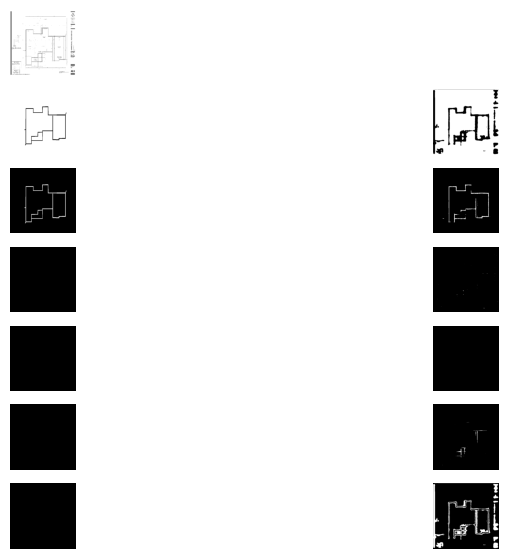

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 5/50 
Average Train Loss: 0.45344844370512133, IOU : 0.4939234049327798


100%|██████████| 15/15 [00:05<00:00,  2.73it/s]


Epoch 5/50 
Average val Loss: 0.5291943073272705, IOU : 0.4192589292923609


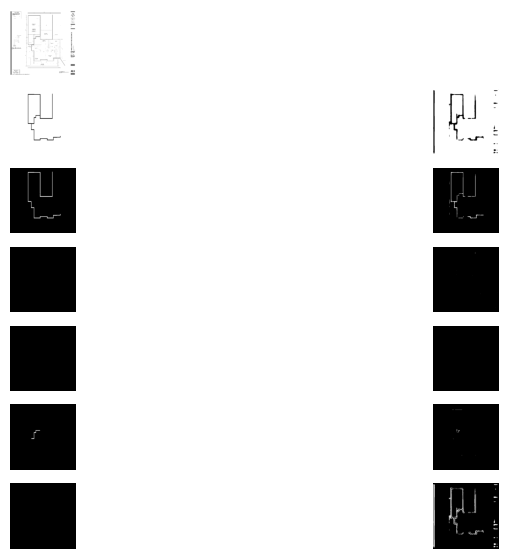

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 6/50 
Average Train Loss: 0.43098936629307977, IOU : 0.5156718593848458


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


Epoch 6/50 
Average val Loss: 0.5107889900604884, IOU : 0.4349923223257065


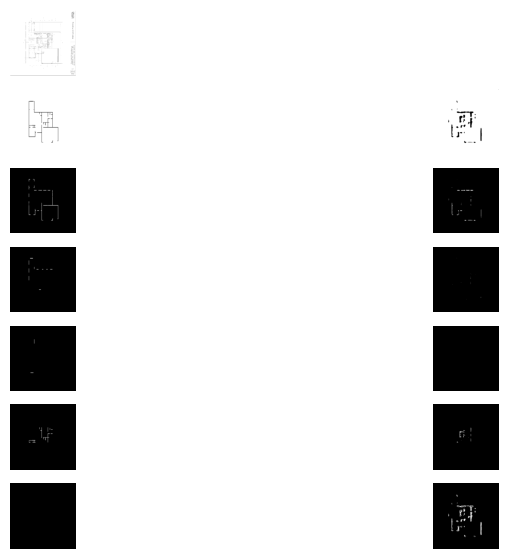

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 7/50 
Average Train Loss: 0.4132696533954497, IOU : 0.5336502955721344


100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


Epoch 7/50 
Average val Loss: 0.49498637616634367, IOU : 0.4487614830334981


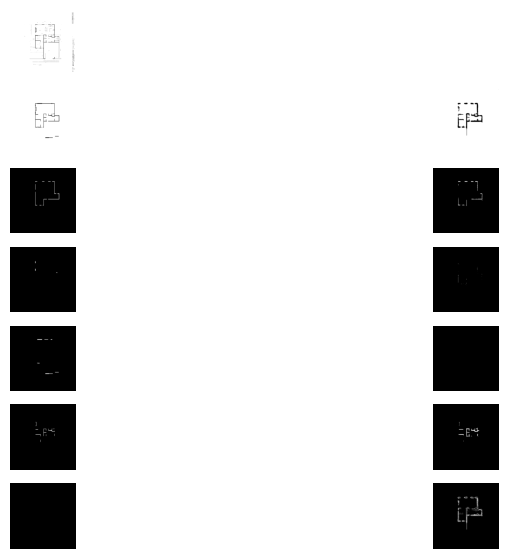

100%|██████████| 59/59 [00:26<00:00,  2.21it/s]


Epoch 8/50 
Average Train Loss: 0.39993683330840984, IOU : 0.5464497224853958


100%|██████████| 15/15 [00:05<00:00,  2.62it/s]


Epoch 8/50 
Average val Loss: 0.48388512805104256, IOU : 0.46427224775155385


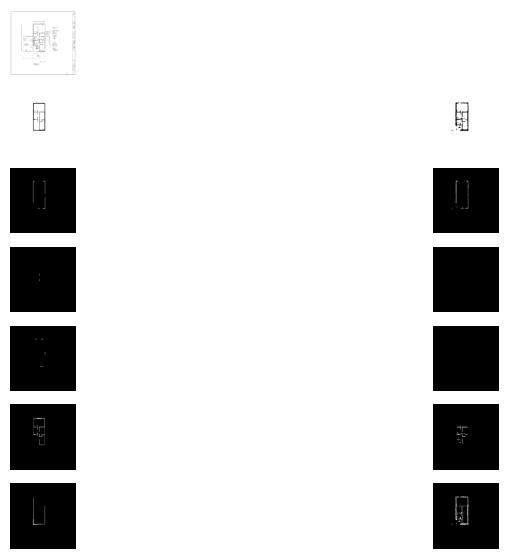

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 9/50 
Average Train Loss: 0.39160861340509256, IOU : 0.5544945608303582


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]


Epoch 9/50 
Average val Loss: 0.46929497669140496, IOU : 0.47468040883541107


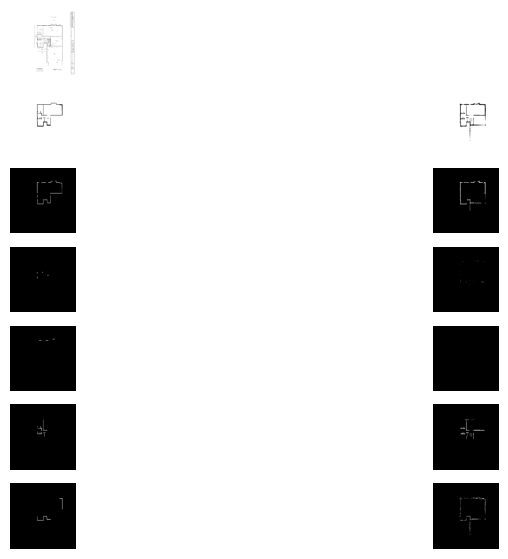

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 10/50 
Average Train Loss: 0.37386411686538384, IOU : 0.5702606402653254


100%|██████████| 15/15 [00:05<00:00,  2.76it/s]


Epoch 10/50 
Average val Loss: 0.467303612579902, IOU : 0.4747742424408595


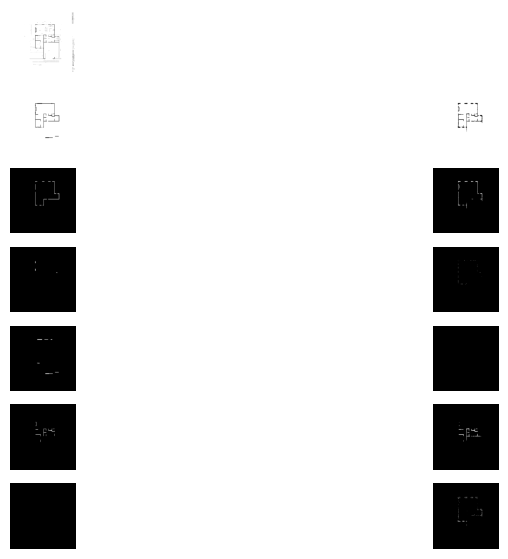

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 11/50 
Average Train Loss: 0.36677675200941956, IOU : 0.5748922333626424


100%|██████████| 15/15 [00:06<00:00,  2.50it/s]


Epoch 11/50 
Average val Loss: 0.44330155129233995, IOU : 0.4946814546982447


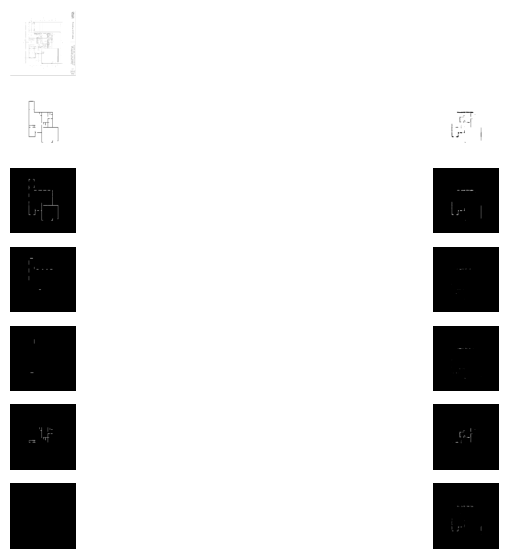

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 12/50 
Average Train Loss: 0.3596067283168372, IOU : 0.5790782842500988


100%|██████████| 15/15 [00:05<00:00,  2.73it/s]


Epoch 12/50 
Average val Loss: 0.42911520302295686, IOU : 0.5019624734918277


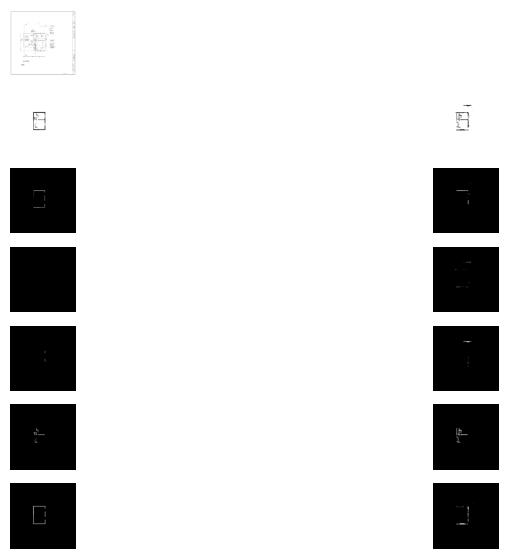

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 13/50 
Average Train Loss: 0.3385525877050803, IOU : 0.5953981005310444


100%|██████████| 15/15 [00:06<00:00,  2.47it/s]


Epoch 13/50 
Average val Loss: 0.3881850607693195, IOU : 0.5347980608542761


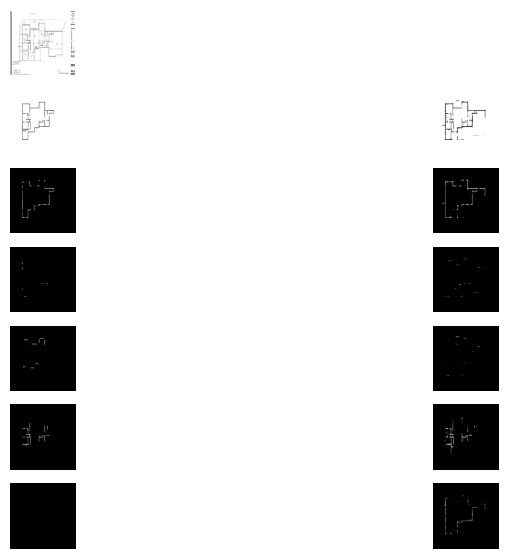

100%|██████████| 59/59 [00:25<00:00,  2.34it/s]


Epoch 14/50 
Average Train Loss: 0.3323482959689099, IOU : 0.5991254134214151


100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


Epoch 14/50 
Average val Loss: 0.4023809959491094, IOU : 0.5232552771766981


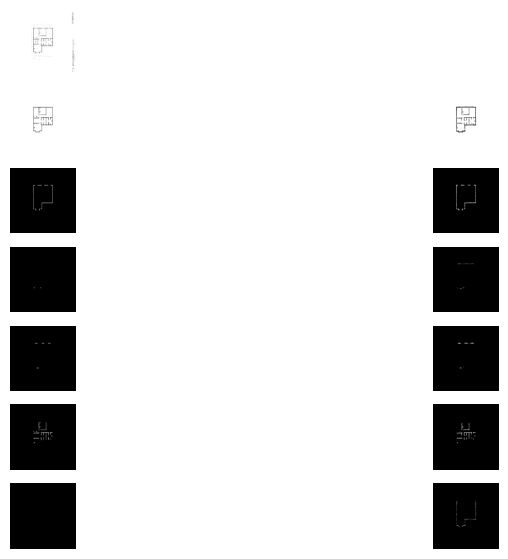

100%|██████████| 59/59 [00:25<00:00,  2.34it/s]


Epoch 15/50 
Average Train Loss: 0.3138455790033469, IOU : 0.6143752564833957


100%|██████████| 15/15 [00:06<00:00,  2.47it/s]


Epoch 15/50 
Average val Loss: 0.3841848328709602, IOU : 0.535644490023454


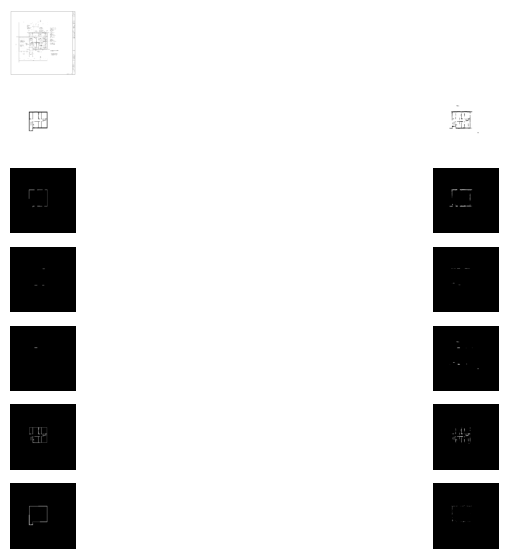

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 16/50 
Average Train Loss: 0.3144503961104142, IOU : 0.6134286449148746


100%|██████████| 15/15 [00:05<00:00,  2.83it/s]


Epoch 16/50 
Average val Loss: 0.3592669660846392, IOU : 0.5581753676136335


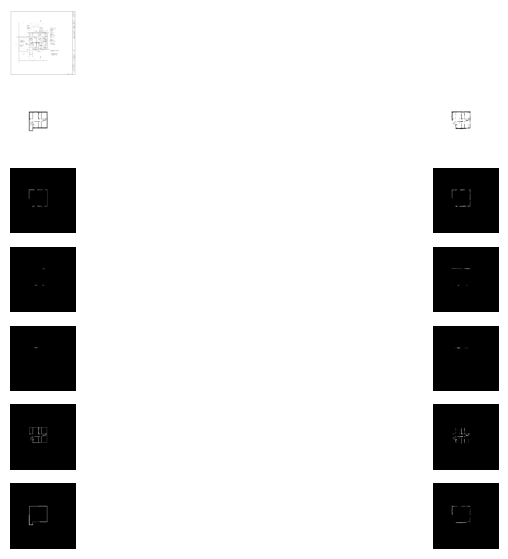

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 17/50 
Average Train Loss: 0.2899417698253104, IOU : 0.6339194926441157


100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


Epoch 17/50 
Average val Loss: 0.37981925457715987, IOU : 0.5405192886789639


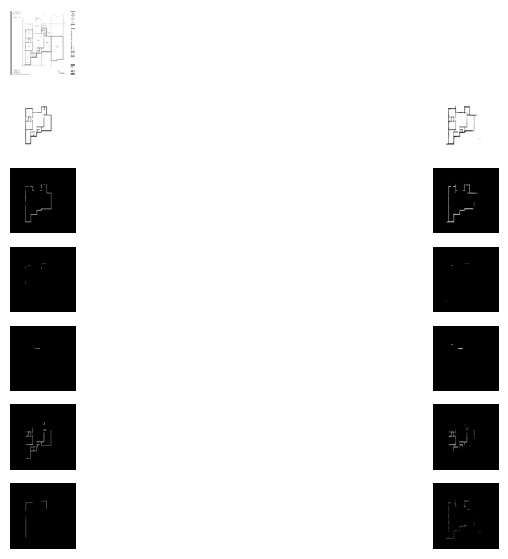

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 18/50 
Average Train Loss: 0.3031025303614531, IOU : 0.6194363066105771


100%|██████████| 15/15 [00:05<00:00,  2.75it/s]


Epoch 18/50 
Average val Loss: 0.3349719355503718, IOU : 0.577043640613556


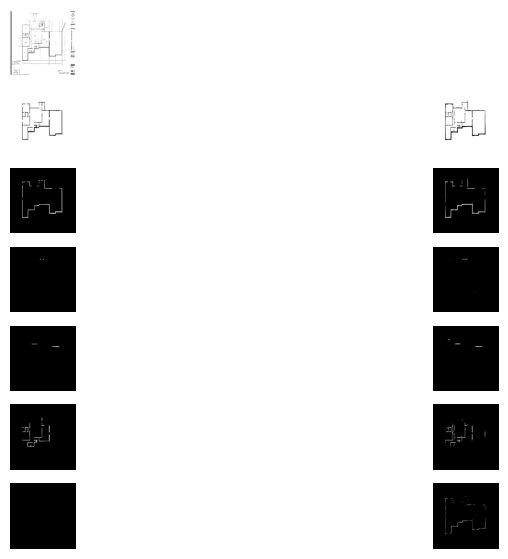

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 19/50 
Average Train Loss: 0.28825500343484267, IOU : 0.6336295669937854


100%|██████████| 15/15 [00:05<00:00,  2.55it/s]


Epoch 19/50 
Average val Loss: 0.3091542229056358, IOU : 0.5986698180437088


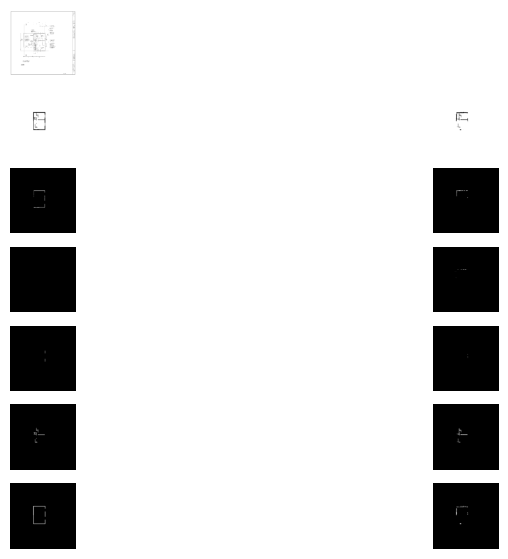

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 20/50 
Average Train Loss: 0.280555679237912, IOU : 0.6394403491571735


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


Epoch 20/50 
Average val Loss: 0.2980419228474299, IOU : 0.6093077729145686


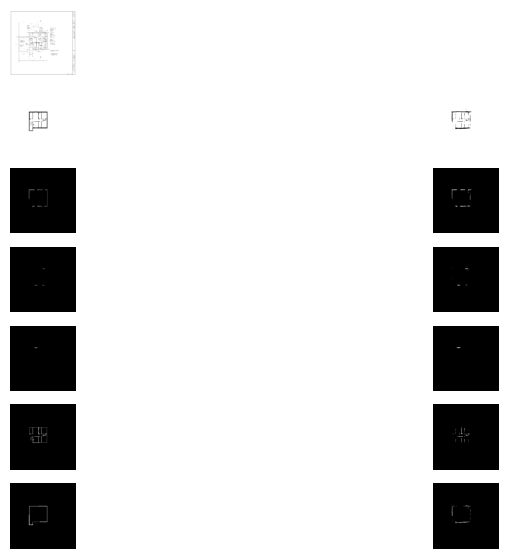

100%|██████████| 59/59 [00:26<00:00,  2.24it/s]


Epoch 21/50 
Average Train Loss: 0.262740729814711, IOU : 0.6557774722962877


100%|██████████| 15/15 [00:05<00:00,  2.78it/s]


Epoch 21/50 
Average val Loss: 0.316679455836614, IOU : 0.5956367055575053


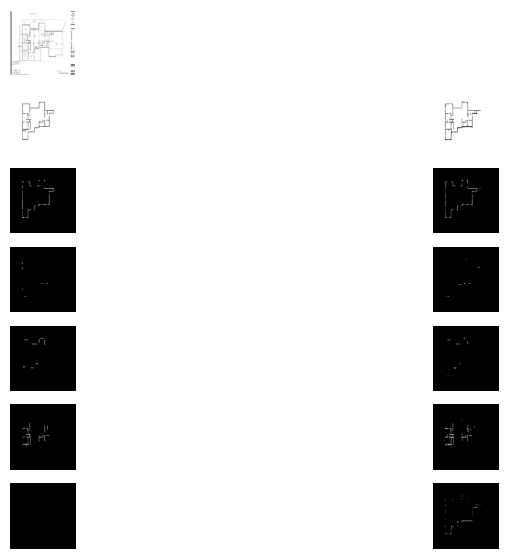

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 22/50 
Average Train Loss: 0.24593089882016056, IOU : 0.6728776956205966


100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


Epoch 22/50 
Average val Loss: 0.3319617807865143, IOU : 0.579656262199084


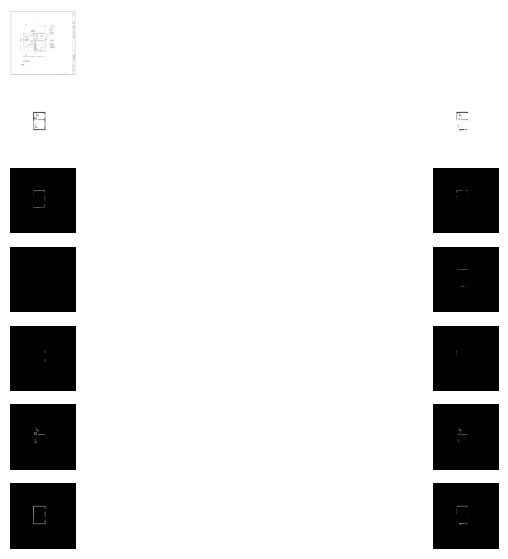

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 23/50 
Average Train Loss: 0.24256247552545837, IOU : 0.675707446229723


100%|██████████| 15/15 [00:05<00:00,  2.76it/s]


Epoch 23/50 
Average val Loss: 0.2711335375905037, IOU : 0.6346069914599259


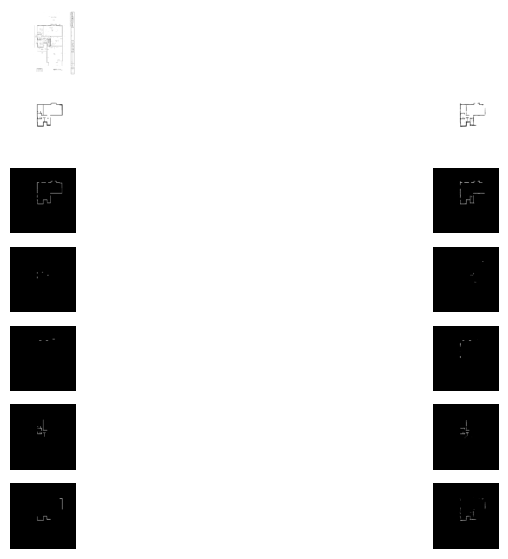

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 24/50 
Average Train Loss: 0.23881530010543953, IOU : 0.6783352455881945


100%|██████████| 15/15 [00:06<00:00,  2.39it/s]


Epoch 24/50 
Average val Loss: 0.3058035920063655, IOU : 0.6011958345770836


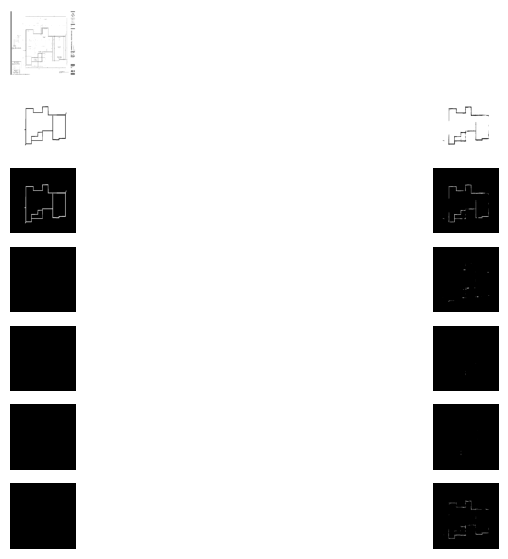

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 25/50 
Average Train Loss: 0.24002406750489974, IOU : 0.6773385959480084


100%|██████████| 15/15 [00:05<00:00,  2.67it/s]


Epoch 25/50 
Average val Loss: 0.2899307663242022, IOU : 0.6174171929558118


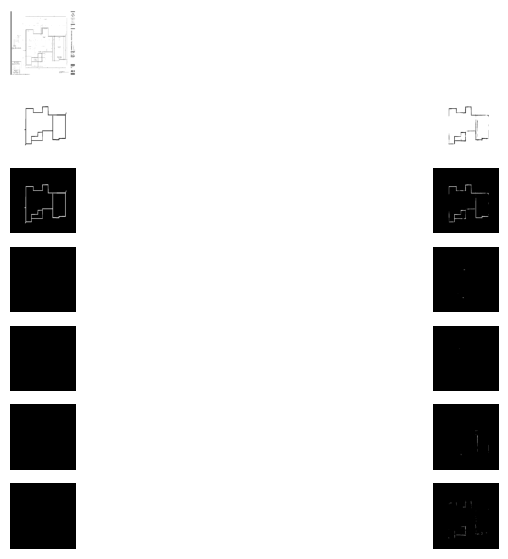

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 26/50 
Average Train Loss: 0.23228363477293465, IOU : 0.6857470642672694


100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


Epoch 26/50 
Average val Loss: 0.26140819638967516, IOU : 0.6468333264191946


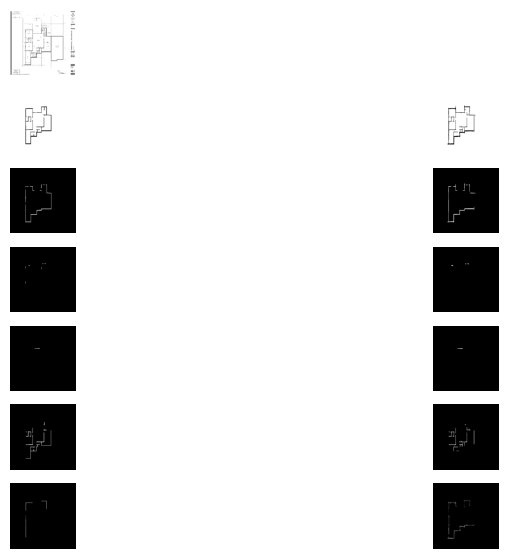

100%|██████████| 59/59 [00:26<00:00,  2.22it/s]


Epoch 27/50 
Average Train Loss: 0.23313746739265714, IOU : 0.684847089947375


100%|██████████| 15/15 [00:05<00:00,  2.55it/s]


Epoch 27/50 
Average val Loss: 0.2786534895499547, IOU : 0.6325838585694631


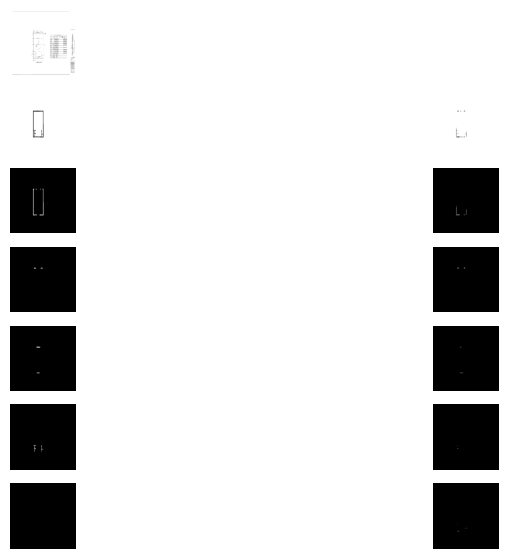

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 28/50 
Average Train Loss: 0.21896410862110177, IOU : 0.6976593468235648


100%|██████████| 15/15 [00:05<00:00,  2.73it/s]


Epoch 28/50 
Average val Loss: 0.28364584743976595, IOU : 0.6292121559381485


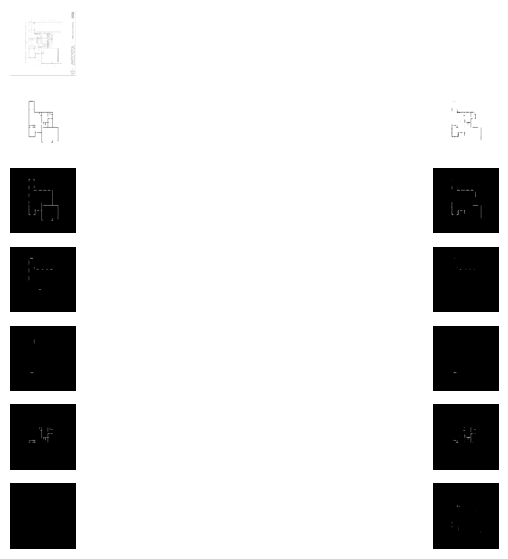

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 29/50 
Average Train Loss: 0.2215572864219736, IOU : 0.6960905580465697


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


Epoch 29/50 
Average val Loss: 0.2434385150671005, IOU : 0.6633524457613628


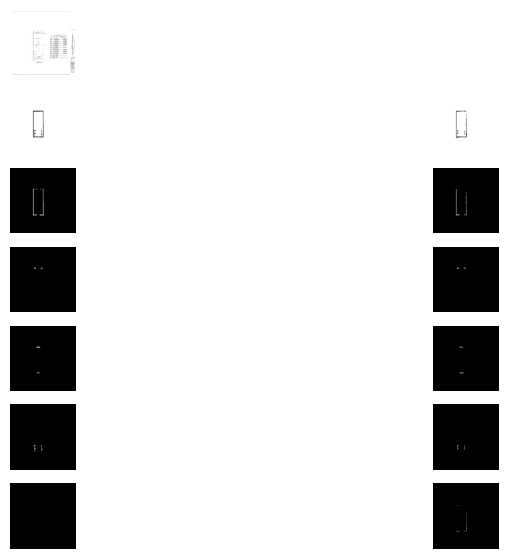

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 30/50 
Average Train Loss: 0.2184794902035935, IOU : 0.6986468517876593


100%|██████████| 15/15 [00:05<00:00,  2.76it/s]


Epoch 30/50 
Average val Loss: 0.23639857148130736, IOU : 0.670409016807874


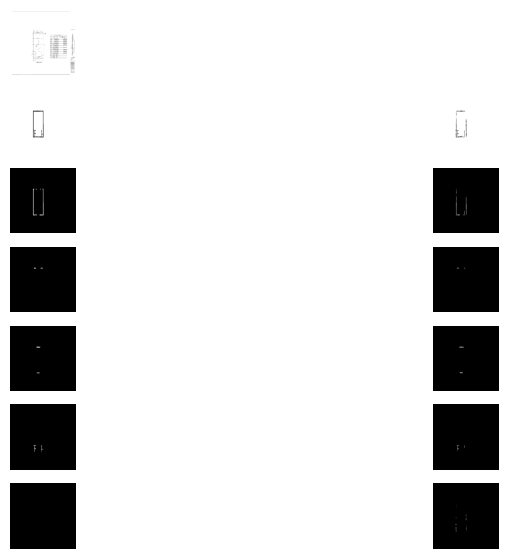

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 31/50 
Average Train Loss: 0.2041318011943693, IOU : 0.7134052248971569


100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


Epoch 31/50 
Average val Loss: 0.22573063373565674, IOU : 0.6828123768170674


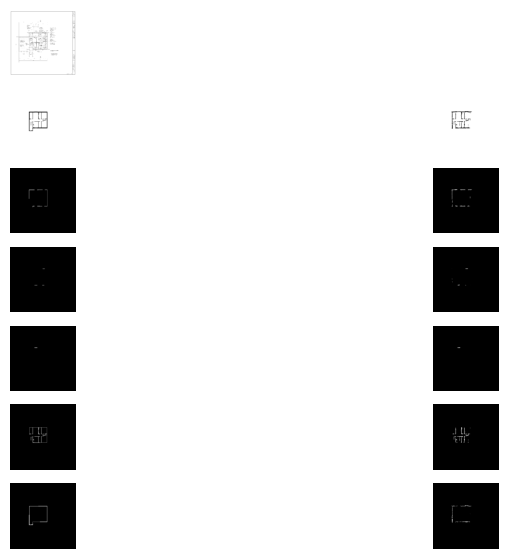

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 32/50 
Average Train Loss: 0.19959379932685298, IOU : 0.7193605689316104


100%|██████████| 15/15 [00:05<00:00,  2.77it/s]


Epoch 32/50 
Average val Loss: 0.23234161585569382, IOU : 0.6740150312582652


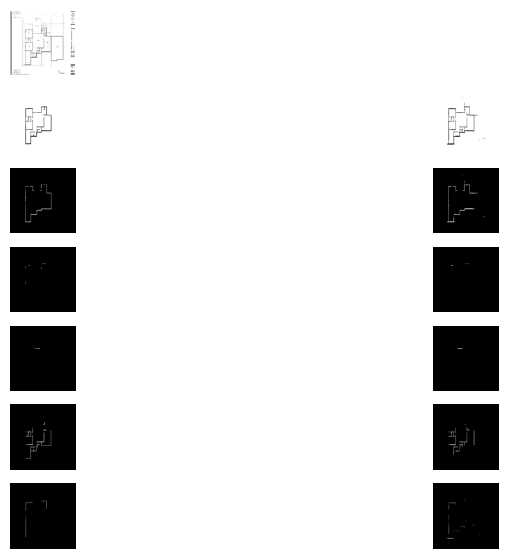

100%|██████████| 59/59 [00:26<00:00,  2.22it/s]


Epoch 33/50 
Average Train Loss: 0.2165106886453232, IOU : 0.7010253020167604


100%|██████████| 15/15 [00:07<00:00,  2.10it/s]


Epoch 33/50 
Average val Loss: 0.2328721118470033, IOU : 0.6761431639393171


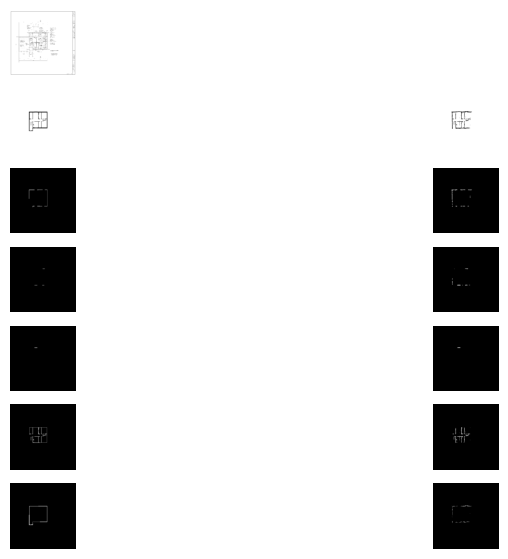

100%|██████████| 59/59 [00:26<00:00,  2.23it/s]


Epoch 34/50 
Average Train Loss: 0.20134569347986037, IOU : 0.718730833851022


100%|██████████| 15/15 [00:06<00:00,  2.34it/s]


Epoch 34/50 
Average val Loss: 0.21433867240945498, IOU : 0.6924464811881383


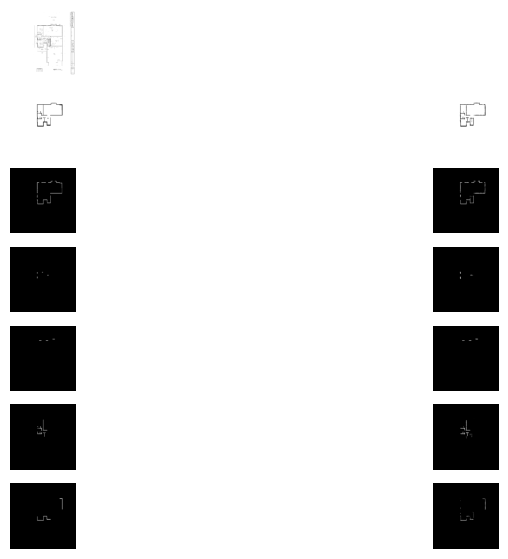

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 35/50 
Average Train Loss: 0.19922866043240084, IOU : 0.719962659864134


100%|██████████| 15/15 [00:05<00:00,  2.60it/s]


Epoch 35/50 
Average val Loss: 0.2152572010954221, IOU : 0.691131018847227


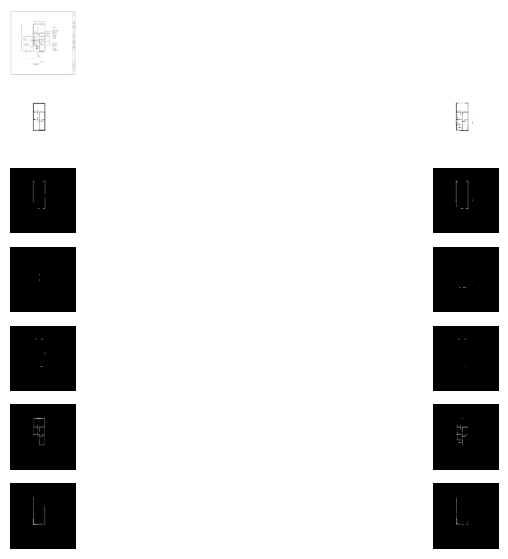

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 36/50 
Average Train Loss: 0.20467275101296856, IOU : 0.7135258919867229


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


Epoch 36/50 
Average val Loss: 0.2117594338953495, IOU : 0.6942884276310602


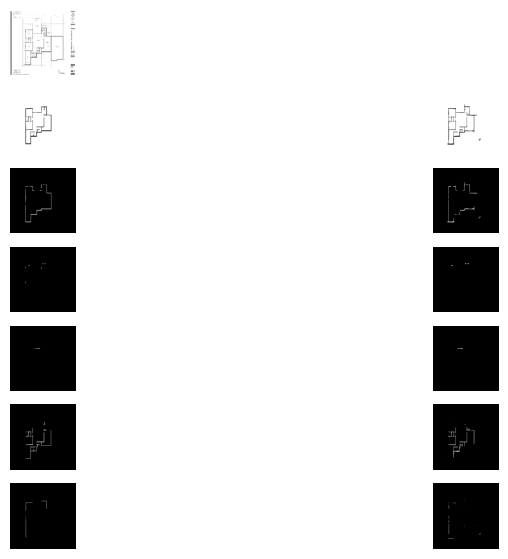

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 37/50 
Average Train Loss: 0.19860033831022428, IOU : 0.7210421252766845


100%|██████████| 15/15 [00:05<00:00,  2.73it/s]


Epoch 37/50 
Average val Loss: 0.22070458754897118, IOU : 0.6877589543660482


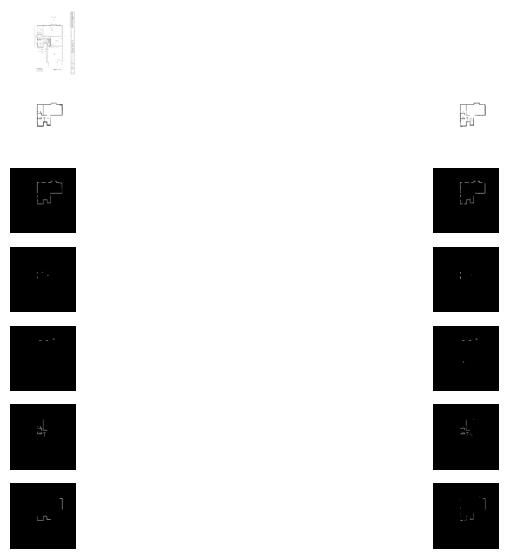

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 38/50 
Average Train Loss: 0.2070005433377415, IOU : 0.7110156504224228


100%|██████████| 15/15 [00:06<00:00,  2.34it/s]


Epoch 38/50 
Average val Loss: 0.22828726867834728, IOU : 0.6756822864214579


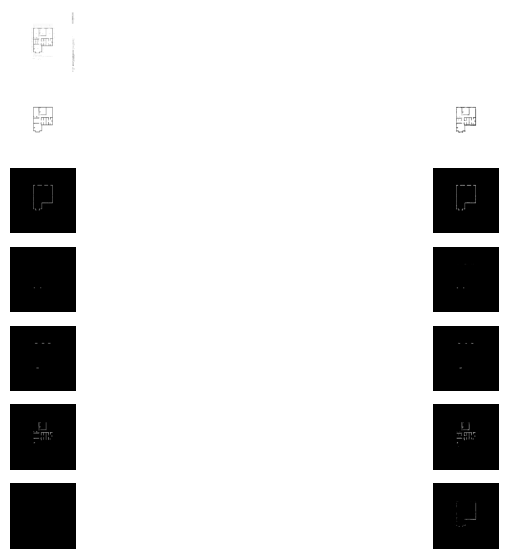

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 39/50 
Average Train Loss: 0.19440784064610883, IOU : 0.724942372886906


100%|██████████| 15/15 [00:06<00:00,  2.44it/s]


Epoch 39/50 
Average val Loss: 0.2339299904803435, IOU : 0.6767376780509948


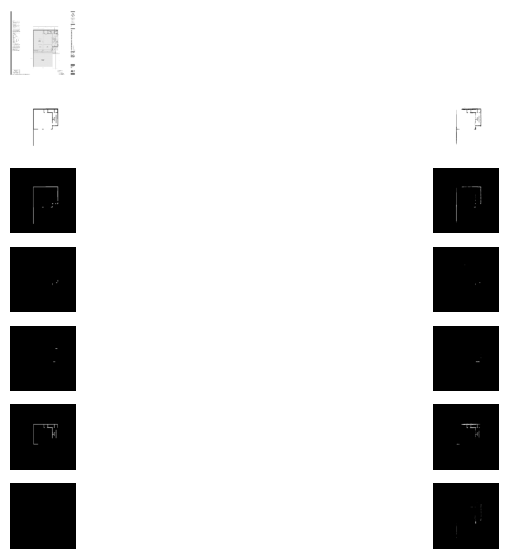

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 40/50 
Average Train Loss: 0.1906136074833477, IOU : 0.7291279136503147


100%|██████████| 15/15 [00:05<00:00,  2.73it/s]


Epoch 40/50 
Average val Loss: 0.20741229206323625, IOU : 0.7006905565659205


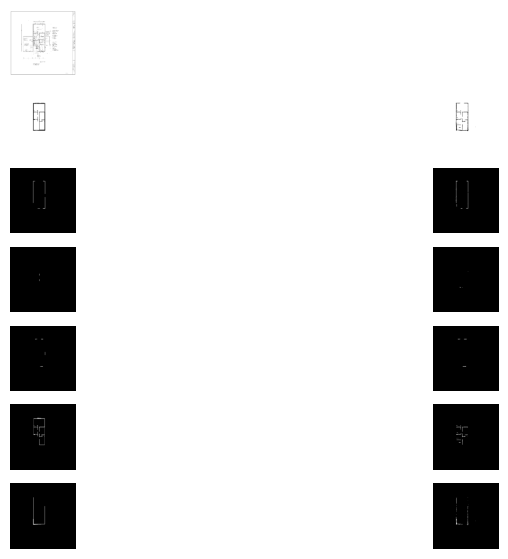

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 41/50 
Average Train Loss: 0.1875273124630547, IOU : 0.7326330624528671


100%|██████████| 15/15 [00:06<00:00,  2.41it/s]


Epoch 41/50 
Average val Loss: 0.2207060605287552, IOU : 0.689608271420002


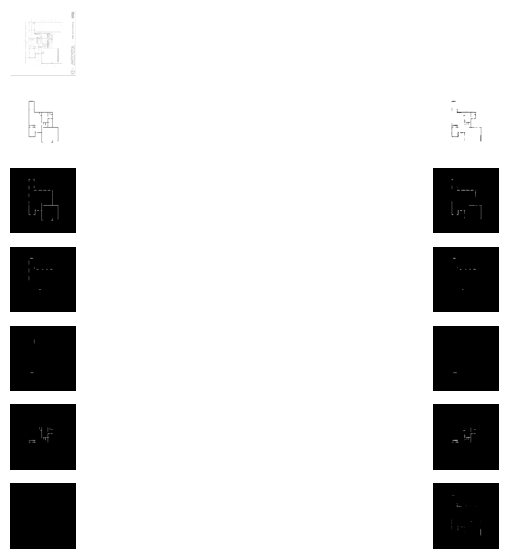

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 42/50 
Average Train Loss: 0.19652723442660486, IOU : 0.7228514556930858


100%|██████████| 15/15 [00:05<00:00,  2.72it/s]


Epoch 42/50 
Average val Loss: 0.20551366955041886, IOU : 0.7033162077267965


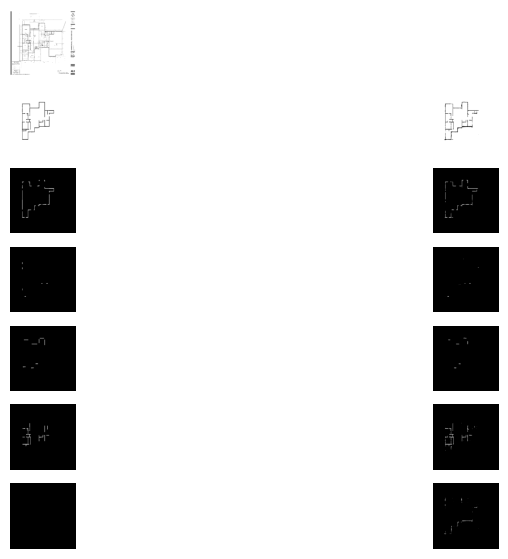

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 43/50 
Average Train Loss: 0.1767341483471189, IOU : 0.7440641091355138


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


Epoch 43/50 
Average val Loss: 0.19338637590408325, IOU : 0.7178826361894608


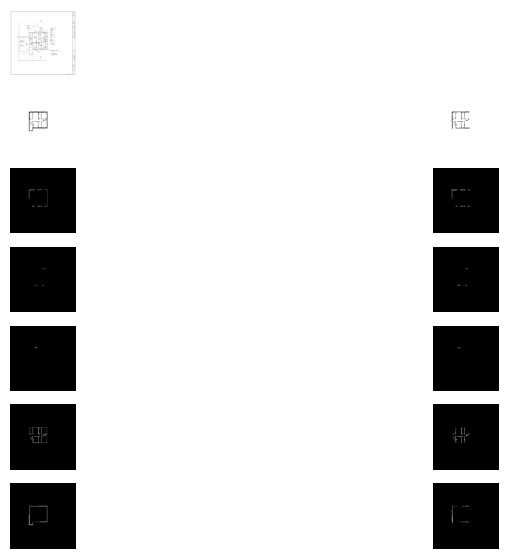

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 44/50 
Average Train Loss: 0.17389652480458115, IOU : 0.7476318646301279


100%|██████████| 15/15 [00:05<00:00,  2.71it/s]


Epoch 44/50 
Average val Loss: 0.19757622281710308, IOU : 0.7146074622869492


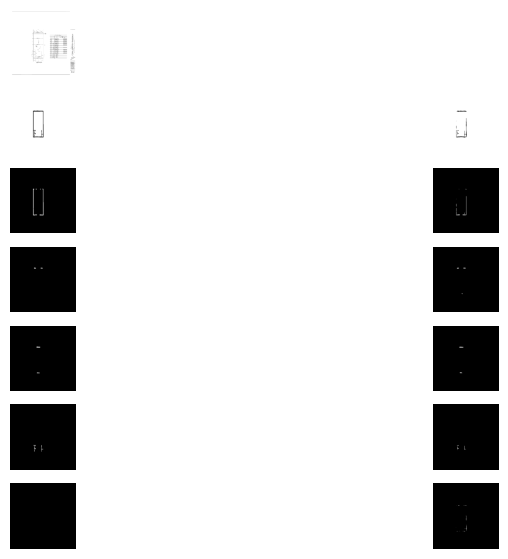

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 45/50 
Average Train Loss: 0.17968786777375992, IOU : 0.7416815711027485


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]


Epoch 45/50 
Average val Loss: 0.20209187567234038, IOU : 0.7087948128581048


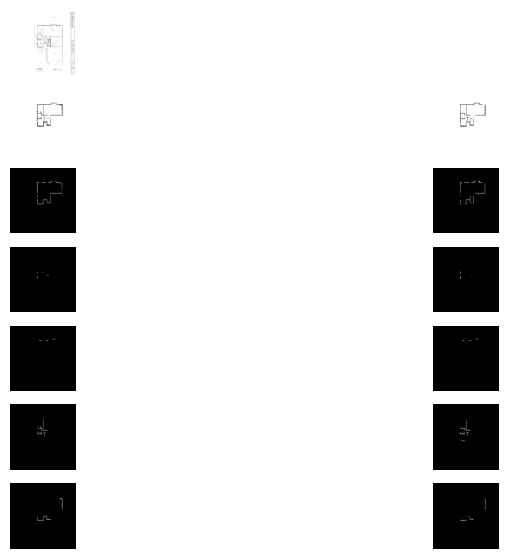

100%|██████████| 59/59 [00:26<00:00,  2.27it/s]


Epoch 46/50 
Average Train Loss: 0.1686533132560109, IOU : 0.7548600399266865


100%|██████████| 15/15 [00:05<00:00,  2.56it/s]


Epoch 46/50 
Average val Loss: 0.18602191905180612, IOU : 0.7270239467422167


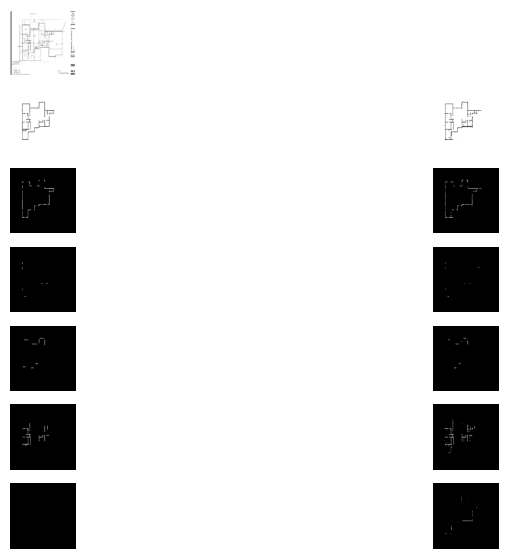

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 47/50 
Average Train Loss: 0.17559745171209956, IOU : 0.7464997318604867


100%|██████████| 15/15 [00:05<00:00,  2.79it/s]


Epoch 47/50 
Average val Loss: 0.21105821977059047, IOU : 0.7030648375550906


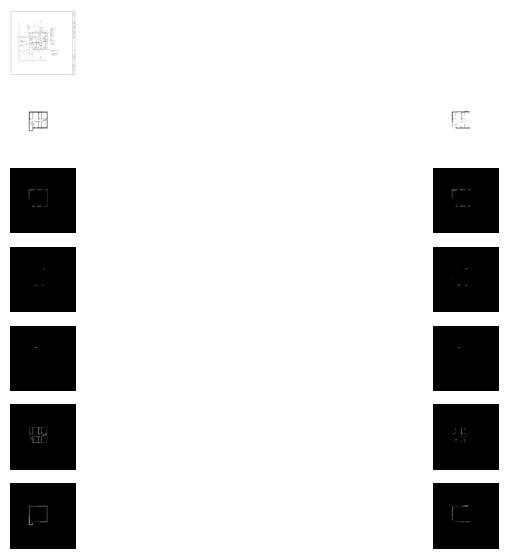

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 48/50 
Average Train Loss: 0.16929741551255081, IOU : 0.7536151454255174


100%|██████████| 15/15 [00:06<00:00,  2.42it/s]


Epoch 48/50 
Average val Loss: 0.1839958483974139, IOU : 0.7304945886135101


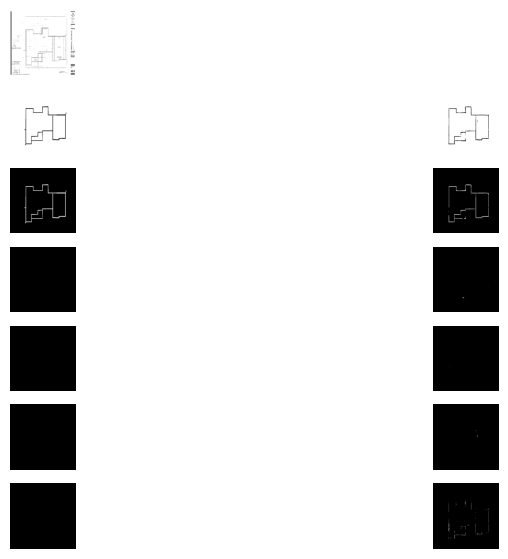

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 49/50 
Average Train Loss: 0.16289966721955876, IOU : 0.7620911970024266


100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


Epoch 49/50 
Average val Loss: 0.1857685757180055, IOU : 0.7254363760352135


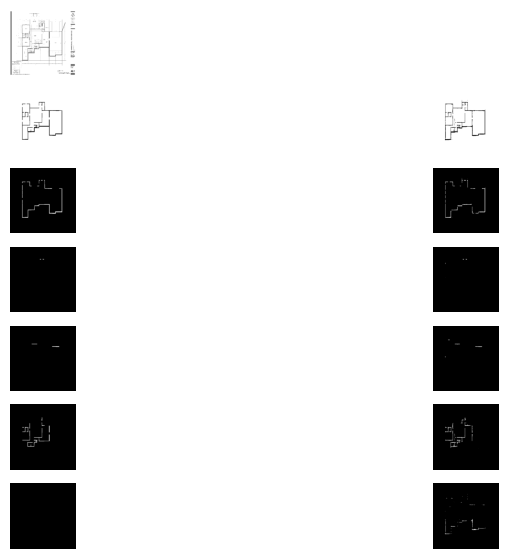

100%|██████████| 59/59 [00:26<00:00,  2.24it/s]


Epoch 50/50 
Average Train Loss: 0.16623926805371766, IOU : 0.7571178874419213


100%|██████████| 15/15 [00:06<00:00,  2.33it/s]


Epoch 50/50 
Average val Loss: 0.17909955208500225, IOU : 0.7347815275192261


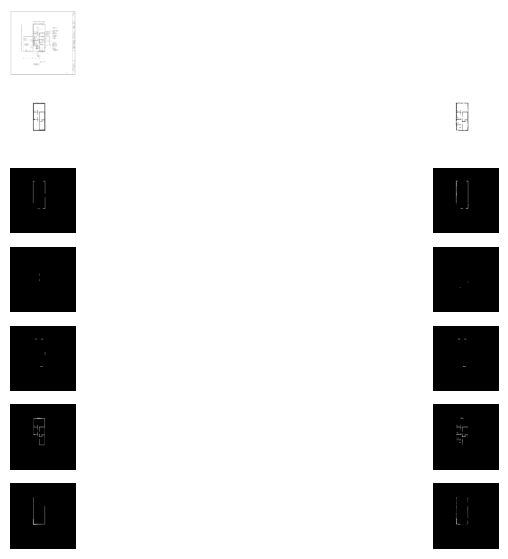

In [20]:
from tqdm import tqdm
import matplotlib.pyplot as plt

num_epochs = 50
model.train()
model = model.to(DEVICE)


for idx in range(num_epochs):
  model.train()
  running_total_loss = 0
  running_iou = 0
  for X,Y in tqdm(train_loader):
    X = X.to(DEVICE).to(torch.float32)
    Y = Y.to(DEVICE).to(torch.int64)
    optimizer.zero_grad()
    Y_pred = model(X)
    # print(X.shape, Y.shape, Y_pred.shape)
    total_loss = loss(Y_pred, Y)
    total_loss.backward()
    running_total_loss += total_loss.cpu().detach().numpy()
    running_iou += (1-metric(Y_pred, Y).cpu().detach().numpy())
    optimizer.step()

#             print(torch.max(stage_4), torch.max(kpts))
# Take the average loss across batches for the epoch

  num_batches = len(train_loader)
  average_loss = running_total_loss / num_batches
  avg_metric = running_iou / num_batches
  print(f"Epoch {idx+1}/{num_epochs} \nAverage Train Loss: {average_loss}, IOU : {avg_metric}")
  # print(X.shape, Y.shape, Y_pred.shape)

  model.eval()
  with torch.no_grad():
    running_total_loss = 0
    running_iou = 0
    for X,Y in tqdm(val_loader):
      X = X.to(DEVICE).to(torch.float32)
      Y = Y.to(DEVICE).to(torch.int64)
      Y_pred = model(X)
      # print(X.shape, Y.shape, Y_pred.shape)
      total_loss = loss(Y_pred, Y)
      # total_loss.backward()
      running_total_loss += total_loss.cpu().detach().numpy()
      running_iou += (1-metric(Y_pred, Y).cpu().detach().numpy())
    # optimizer.step()

#             print(torch.max(stage_4), torch.max(kpts))
# Take the average loss across batches for the epoch

  num_batches = len(val_loader)
  average_loss = running_total_loss / num_batches
  avg_metric = running_iou / num_batches
  print(f"Epoch {idx+1}/{num_epochs} \nAverage val Loss: {average_loss}, IOU : {avg_metric}")

  I = X.cpu().detach().numpy()[0,:,:,:].transpose(1,2,0)
  S = Y.cpu().detach().numpy()[0,:,:,:].transpose(1,2,0)
  # print("shape : <", torch.argmax(torch.nn.functional.softmax(Y_pred, dim = 1), dim=1).shape)
  S_pred = torch.argmax(torch.nn.functional.softmax(Y_pred, dim = 1),dim=1).cpu().detach().numpy()[0,:,:]
  # print(I.shape, np.unique(S), np.unique(S_pred))

  figure = plt.figure(figsize=(10,7))

  figure.add_subplot(7,2,1)
  plt.imshow(I[:,:,:], cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,3)
  plt.imshow(np.where(S==0, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,4)
  plt.imshow(np.where(S_pred == 0, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,5)
  plt.imshow(np.where(S==1, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,6)
  plt.imshow(np.where(S_pred == 1, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,7)
  plt.imshow(np.where(S==2, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,8)
  plt.imshow(np.where(S_pred == 2, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,9)
  plt.imshow(np.where(S==3, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,10)
  plt.imshow(np.where(S_pred == 3, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,11)
  plt.imshow(np.where(S==4, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,12)
  plt.imshow(np.where(S_pred == 4, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,13)
  plt.imshow(np.where(S==5, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,14)
  plt.imshow(np.where(S_pred == 5, 255, 0), cmap="gray")
  plt.axis("off")
  plt.show()
  plt.close()
  # print(Y_pred.shape, Y.shape)



Dice : 0.82, mIOU : 0.73

## Segformer Model

In [ ]:
ENCODER = 'mit_b2'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['0', '1', '2', '3', '4', '5']
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

model = smp.Unet(
    encoder_name=ENCODER,        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights=ENCODER_WEIGHTS,     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=6,                      # model output channels (number of classes in your dataset)
    activation=ACTIVATION
)

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
print("Model Params : ", pytorch_total_params)

Model Params :  27477734


In [ ]:
import segmentation_models_pytorch as su
from torch.nn import functional as F
loss = su.losses.DiceLoss(mode = "multiclass")
metric = su.losses.JaccardLoss(mode="multiclass")

optimizer = torch.optim.Adam([
    dict(params=model.parameters(), lr=0.0001),
])

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 1/50 
Average Train Loss: 0.6452550605192022, IOU : 0.3265968540967521


100%|██████████| 15/15 [00:05<00:00,  2.55it/s]


Epoch 1/50 
Average val Loss: 0.7103774338960648, IOU : 0.257972514629364


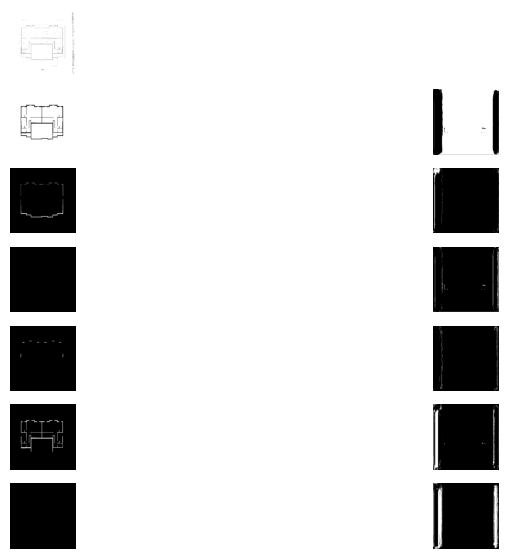

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 2/50 
Average Train Loss: 0.6128648442484564, IOU : 0.3526777198254052


100%|██████████| 15/15 [00:05<00:00,  2.74it/s]


Epoch 2/50 
Average val Loss: 0.6846135238806407, IOU : 0.2784176588058472


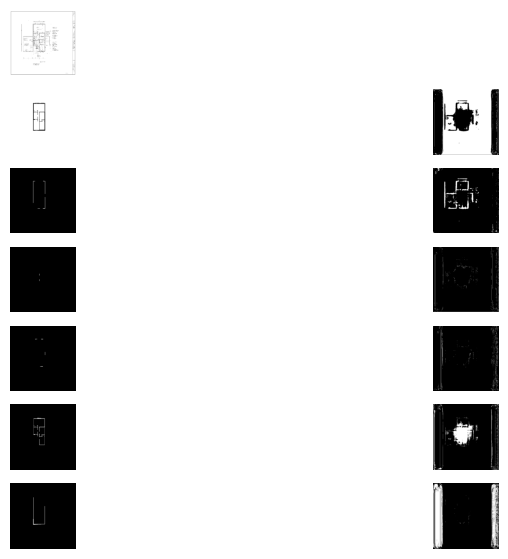

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 3/50 
Average Train Loss: 0.5873903543767283, IOU : 0.37459104129318466


100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


Epoch 3/50 
Average val Loss: 0.749068542321523, IOU : 0.2248588025569916


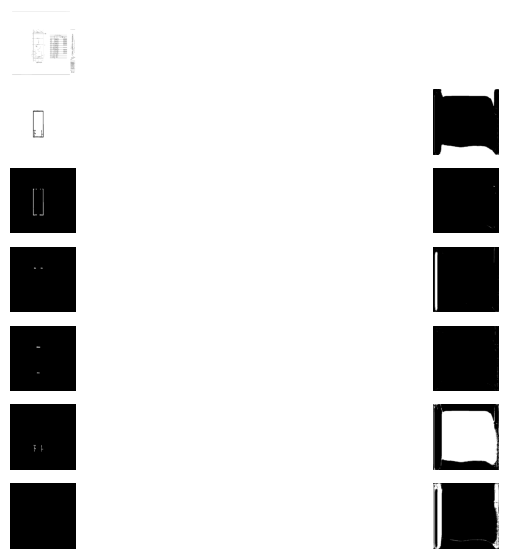

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 4/50 
Average Train Loss: 0.5661068348435022, IOU : 0.39311243896767245


100%|██████████| 15/15 [00:06<00:00,  2.23it/s]


Epoch 4/50 
Average val Loss: 0.6456169088681539, IOU : 0.3171273559331894


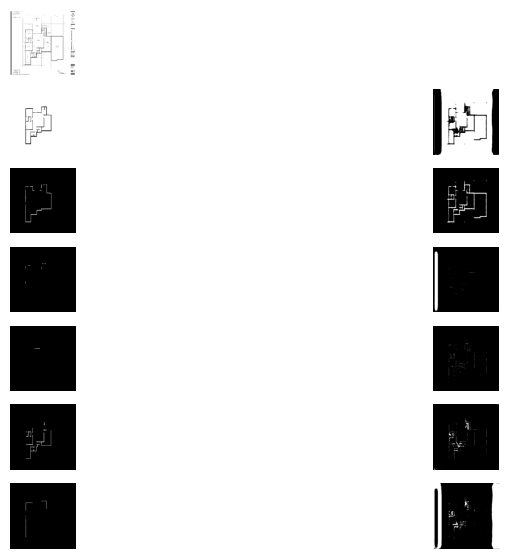

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 5/50 
Average Train Loss: 0.5447161711626134, IOU : 0.4114228399880862


100%|██████████| 15/15 [00:05<00:00,  2.51it/s]


Epoch 5/50 
Average val Loss: 0.6152928700049718, IOU : 0.3403134157260259


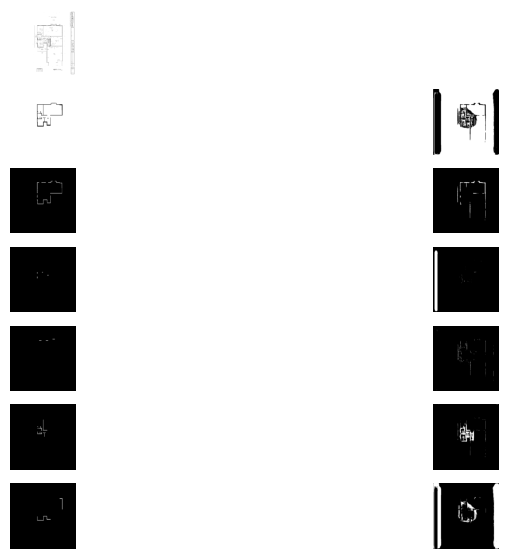

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 6/50 
Average Train Loss: 0.5159393439732366, IOU : 0.43944164409728376


100%|██████████| 15/15 [00:05<00:00,  2.70it/s]


Epoch 6/50 
Average val Loss: 0.6259552955627441, IOU : 0.3380384624004364


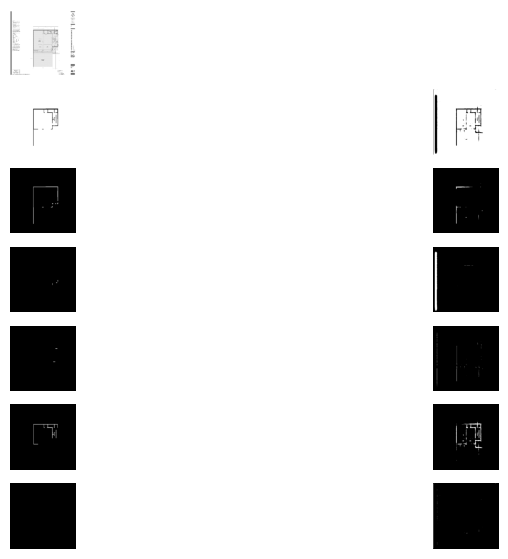

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 7/50 
Average Train Loss: 0.4899135457383374, IOU : 0.4668273738569627


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


Epoch 7/50 
Average val Loss: 0.5578845004240672, IOU : 0.39738943974177043


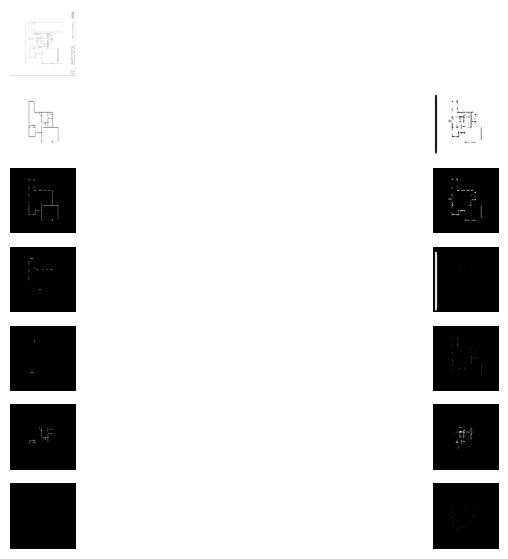

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 8/50 
Average Train Loss: 0.46765579744163205, IOU : 0.48789149279690397


100%|██████████| 15/15 [00:06<00:00,  2.42it/s]


Epoch 8/50 
Average val Loss: 0.5382337994873524, IOU : 0.4147701770067215


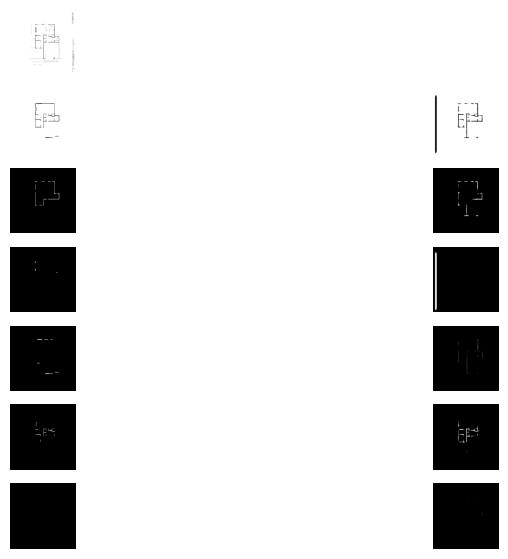

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 9/50 
Average Train Loss: 0.4481288965602042, IOU : 0.5050441517447264


100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


Epoch 9/50 
Average val Loss: 0.5196279195447763, IOU : 0.43112608740727104


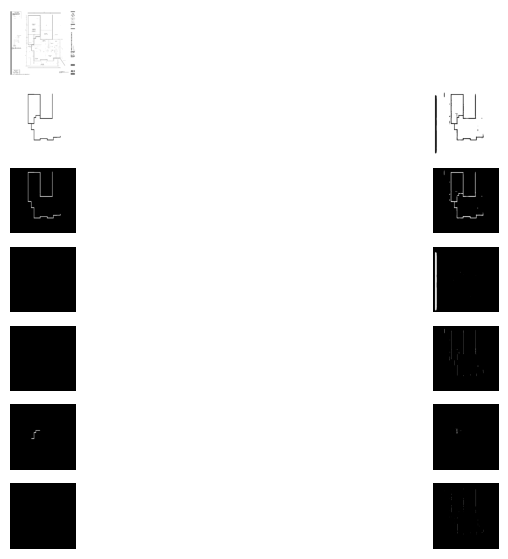

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 10/50 
Average Train Loss: 0.44130323295307866, IOU : 0.511224470353859


100%|██████████| 15/15 [00:05<00:00,  2.68it/s]


Epoch 10/50 
Average val Loss: 0.6475160042444865, IOU : 0.33408470153808595


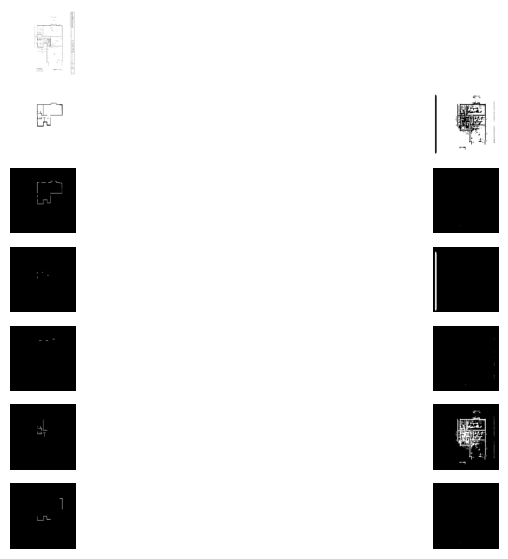

100%|██████████| 59/59 [00:26<00:00,  2.19it/s]


Epoch 11/50 
Average Train Loss: 0.4319205762329117, IOU : 0.519474334999035


100%|██████████| 15/15 [00:05<00:00,  2.51it/s]


Epoch 11/50 
Average val Loss: 0.5155039325356483, IOU : 0.4340963110327721


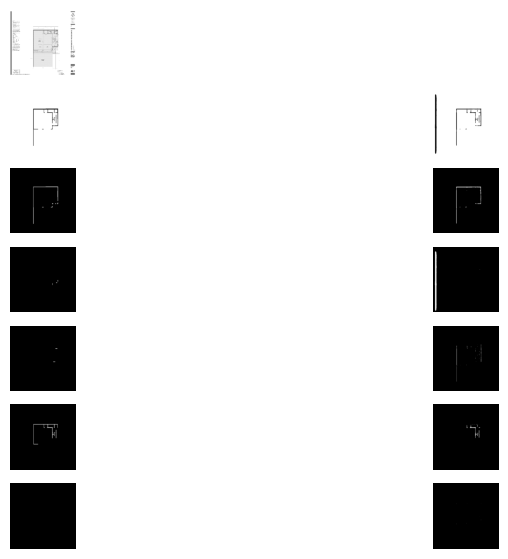

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 12/50 
Average Train Loss: 0.4223557925128015, IOU : 0.5276118420869491


100%|██████████| 15/15 [00:06<00:00,  2.50it/s]


Epoch 12/50 
Average val Loss: 0.5075683136781056, IOU : 0.44456332723299663


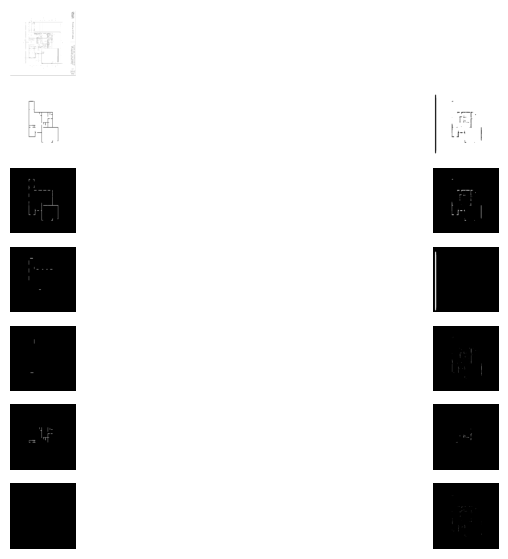

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 13/50 
Average Train Loss: 0.41659059879070115, IOU : 0.5327453629224229


100%|██████████| 15/15 [00:05<00:00,  2.55it/s]


Epoch 13/50 
Average val Loss: 0.48346173639098805, IOU : 0.46045516928037006


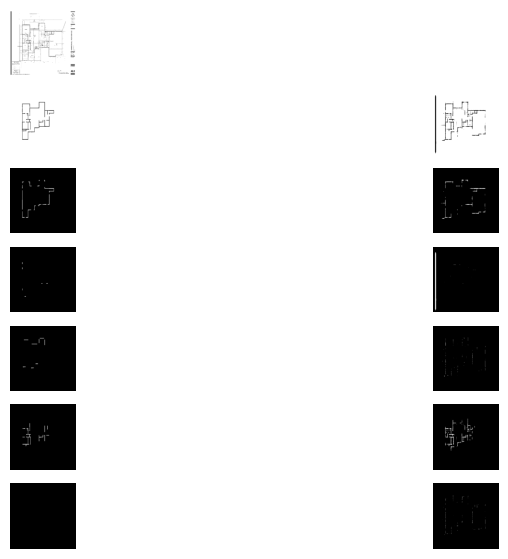

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 14/50 
Average Train Loss: 0.4072035318516763, IOU : 0.5405452321204594


100%|██████████| 15/15 [00:05<00:00,  2.69it/s]


Epoch 14/50 
Average val Loss: 0.47145941853523254, IOU : 0.47215012411276497


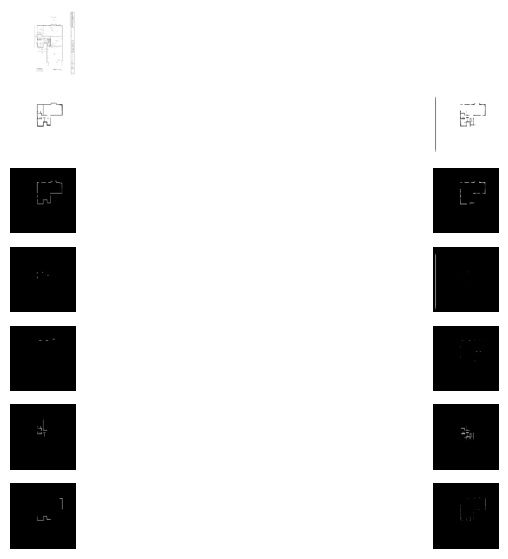

100%|██████████| 59/59 [00:26<00:00,  2.23it/s]


Epoch 15/50 
Average Train Loss: 0.40378626724468325, IOU : 0.542958253852518


100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


Epoch 15/50 
Average val Loss: 0.46630842859546345, IOU : 0.47329985797405244


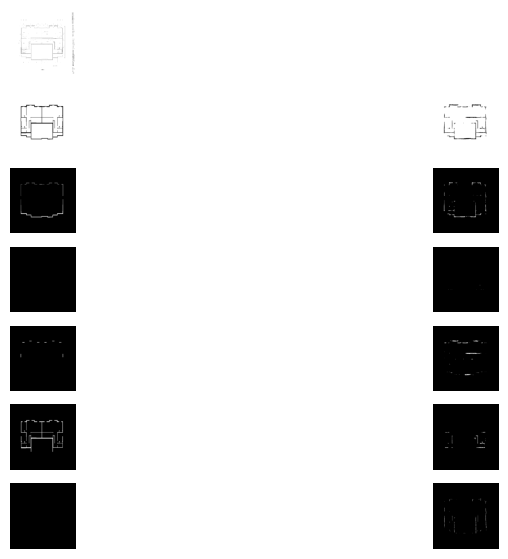

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 16/50 
Average Train Loss: 0.3936576936512365, IOU : 0.5515900337595051


100%|██████████| 15/15 [00:05<00:00,  2.50it/s]


Epoch 16/50 
Average val Loss: 0.4408564048508803, IOU : 0.49273407384753226


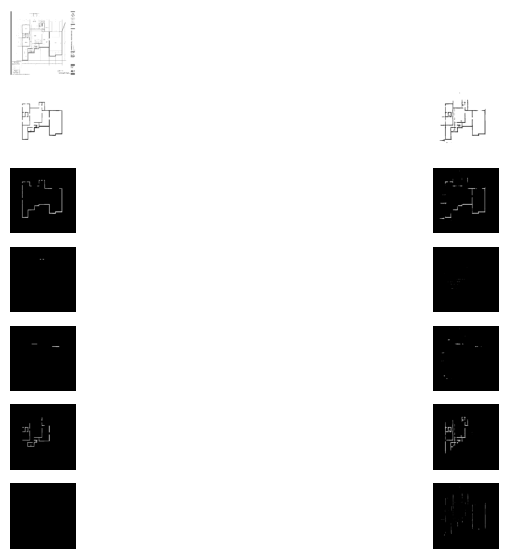

100%|██████████| 59/59 [00:26<00:00,  2.26it/s]


Epoch 17/50 
Average Train Loss: 0.3829071405383174, IOU : 0.559254213595384


100%|██████████| 15/15 [00:05<00:00,  2.67it/s]


Epoch 17/50 
Average val Loss: 0.506513283153375, IOU : 0.44144811232884723


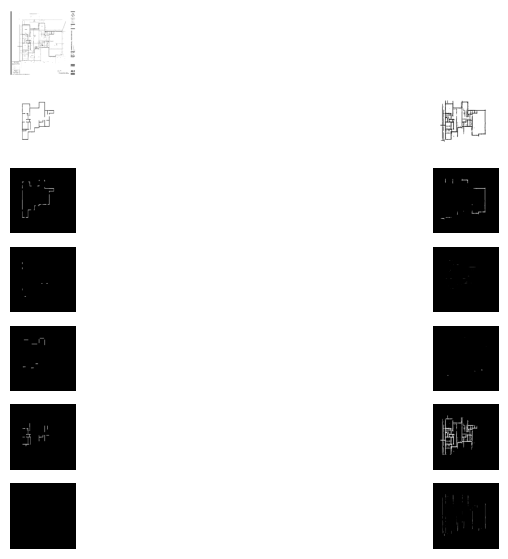

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 18/50 
Average Train Loss: 0.3732244485626155, IOU : 0.5658675853944368


100%|██████████| 15/15 [00:05<00:00,  2.71it/s]


Epoch 18/50 
Average val Loss: 0.4212938723464807, IOU : 0.505048057436943


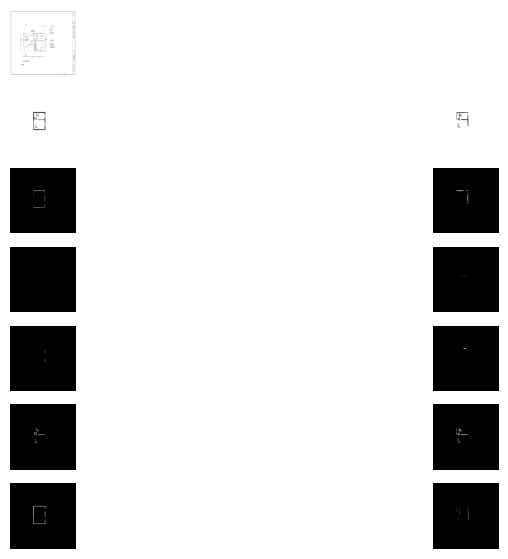

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 19/50 
Average Train Loss: 0.3676920033225758, IOU : 0.5714199456496764


100%|██████████| 15/15 [00:05<00:00,  2.50it/s]


Epoch 19/50 
Average val Loss: 0.4547765808800856, IOU : 0.4771209582686424


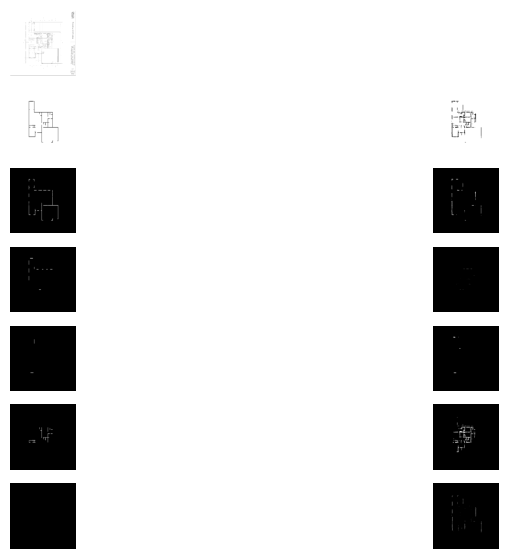

100%|██████████| 59/59 [00:25<00:00,  2.35it/s]


Epoch 20/50 
Average Train Loss: 0.36604507781083745, IOU : 0.5730539337589832


100%|██████████| 15/15 [00:06<00:00,  2.47it/s]


Epoch 20/50 
Average val Loss: 0.4209203357497851, IOU : 0.5058932468295098


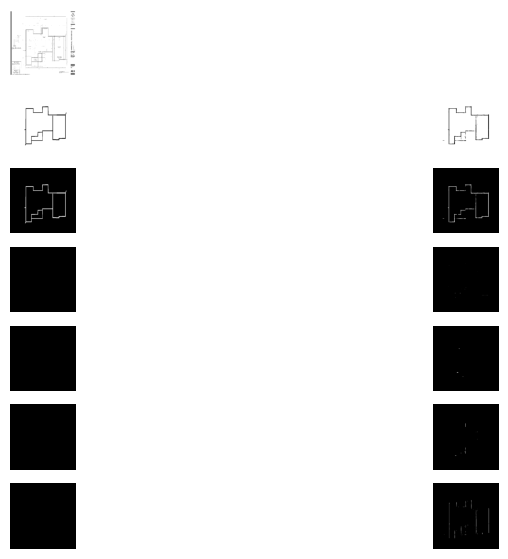

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 21/50 
Average Train Loss: 0.35670196793389397, IOU : 0.5811225544164051


100%|██████████| 15/15 [00:05<00:00,  2.69it/s]


Epoch 21/50 
Average val Loss: 0.3852823182940483, IOU : 0.536844373246034


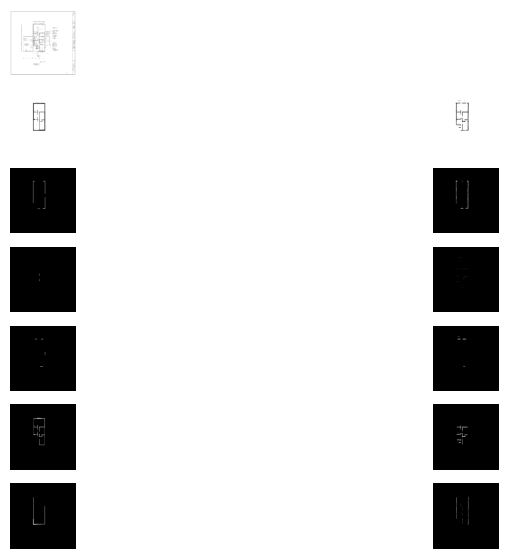

100%|██████████| 59/59 [00:26<00:00,  2.27it/s]


Epoch 22/50 
Average Train Loss: 0.3525652101448879, IOU : 0.5828051885700453


100%|██████████| 15/15 [00:06<00:00,  2.44it/s]


Epoch 22/50 
Average val Loss: 0.3948148993154367, IOU : 0.5292304456233978


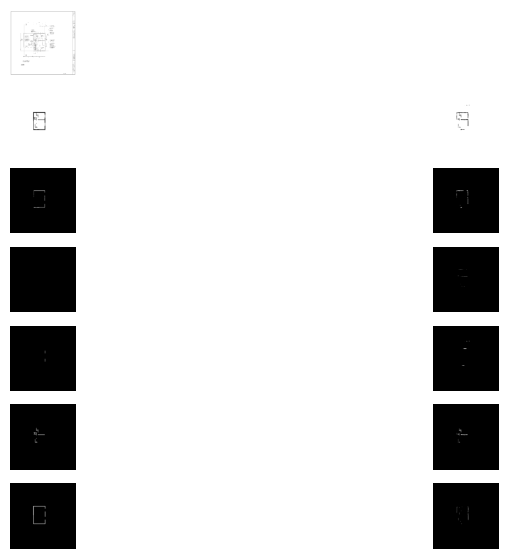

100%|██████████| 59/59 [00:26<00:00,  2.27it/s]


Epoch 23/50 
Average Train Loss: 0.3429360706260491, IOU : 0.5900413404471414


100%|██████████| 15/15 [00:05<00:00,  2.51it/s]


Epoch 23/50 
Average val Loss: 0.37691802432139715, IOU : 0.5415666262308757


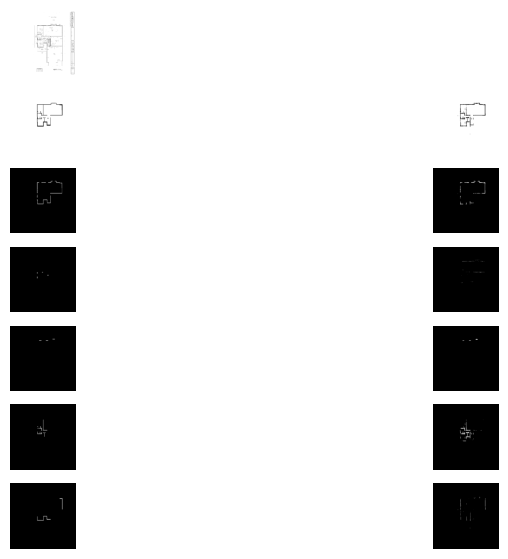

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 24/50 
Average Train Loss: 0.340164503390443, IOU : 0.5910127513363199


100%|██████████| 15/15 [00:06<00:00,  2.44it/s]


Epoch 24/50 
Average val Loss: 0.3637330964207649, IOU : 0.5532922608156999


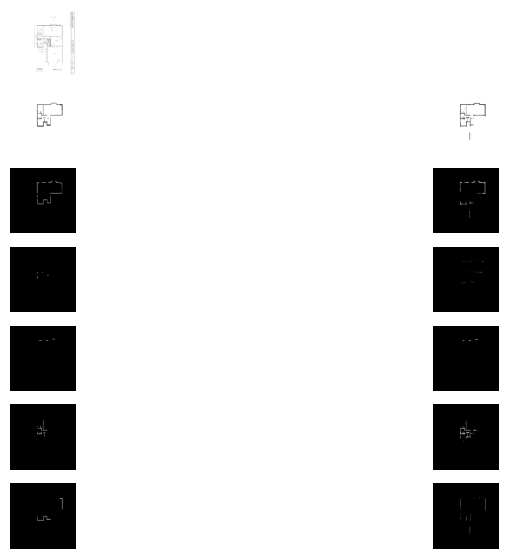

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 25/50 
Average Train Loss: 0.3383042188223167, IOU : 0.5931143685504479


100%|██████████| 15/15 [00:05<00:00,  2.69it/s]


Epoch 25/50 
Average val Loss: 0.35867846657832464, IOU : 0.557700980703036


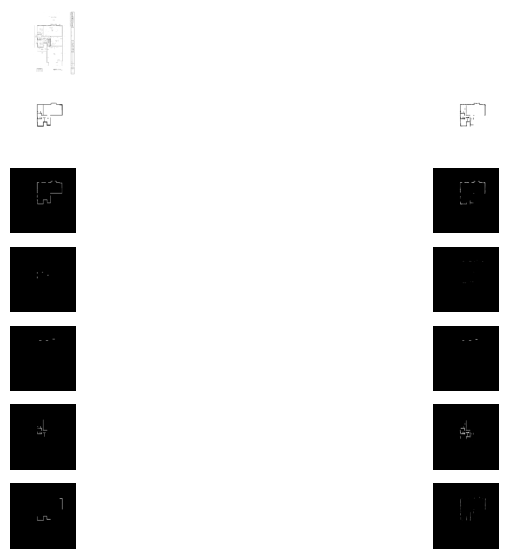

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 26/50 
Average Train Loss: 0.3188151660162198, IOU : 0.6093039937569933


100%|██████████| 15/15 [00:05<00:00,  2.66it/s]


Epoch 26/50 
Average val Loss: 0.3774436041712761, IOU : 0.5367377539475758


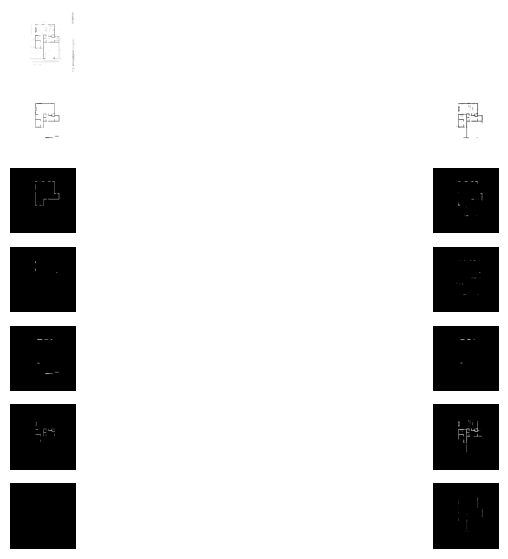

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 27/50 
Average Train Loss: 0.3271518590449655, IOU : 0.6021403675756843


100%|██████████| 15/15 [00:06<00:00,  2.49it/s]


Epoch 27/50 
Average val Loss: 0.3452840770284335, IOU : 0.5676253964503606


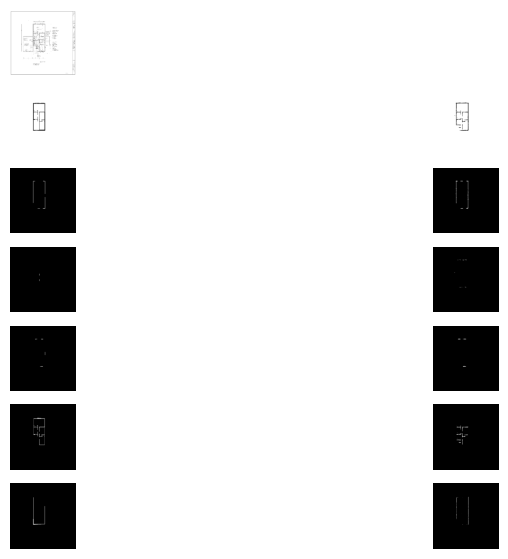

100%|██████████| 59/59 [00:25<00:00,  2.29it/s]


Epoch 28/50 
Average Train Loss: 0.31277814648564023, IOU : 0.6137363959885187


100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


Epoch 28/50 
Average val Loss: 0.37539047996203107, IOU : 0.5398848603169123


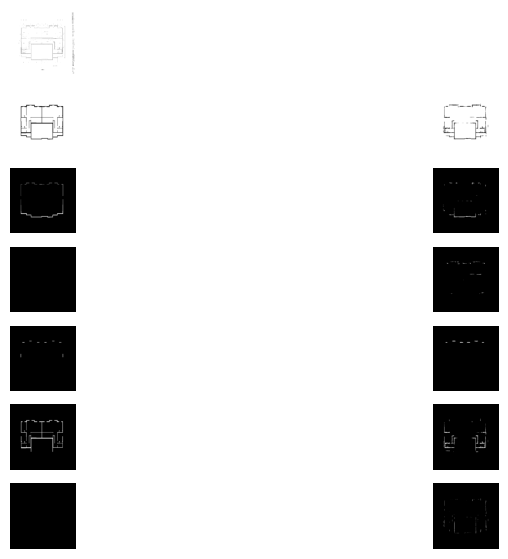

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 29/50 
Average Train Loss: 0.31496396311558783, IOU : 0.6106974154166183


100%|██████████| 15/15 [00:06<00:00,  2.49it/s]


Epoch 29/50 
Average val Loss: 0.3285089646776517, IOU : 0.5815700237949689


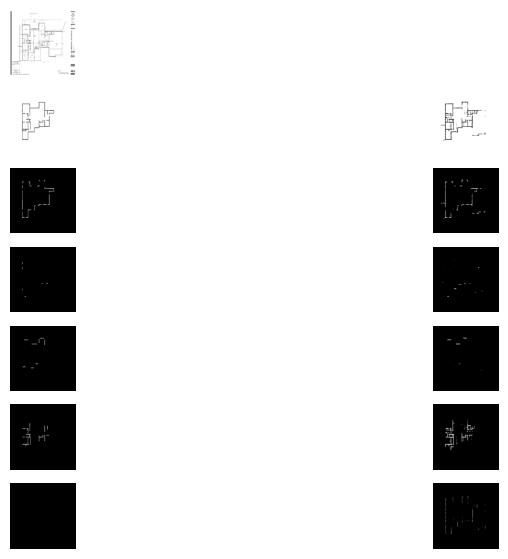

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 30/50 
Average Train Loss: 0.309121919407162, IOU : 0.6164658053588691


100%|██████████| 15/15 [00:05<00:00,  2.68it/s]


Epoch 30/50 
Average val Loss: 0.32893070032199223, IOU : 0.5793798183401425


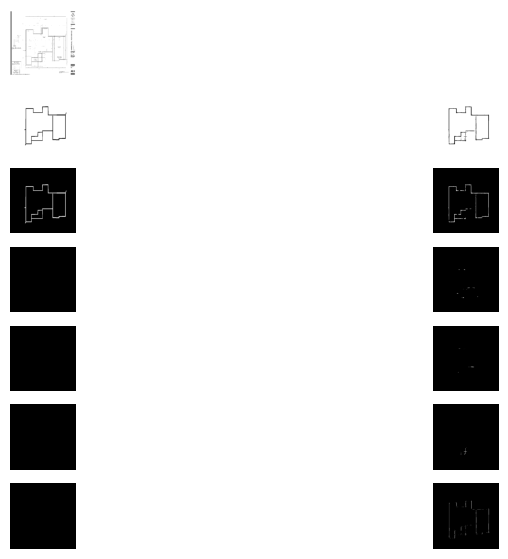

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 31/50 
Average Train Loss: 0.3070408284340559, IOU : 0.6178191907198752


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


Epoch 31/50 
Average val Loss: 0.32834472010533017, IOU : 0.581252850095431


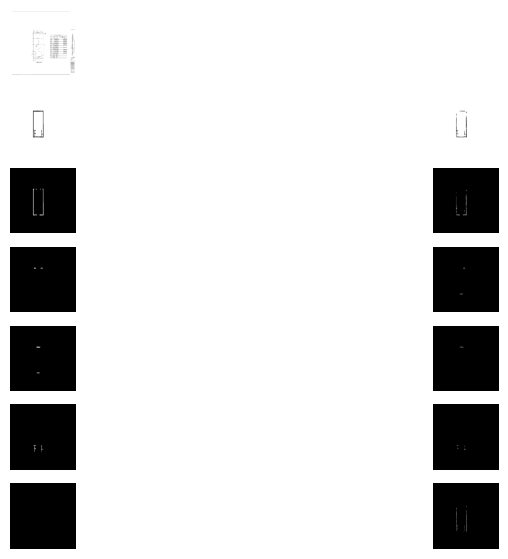

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 32/50 
Average Train Loss: 0.3028540895517789, IOU : 0.6216026480128136


100%|██████████| 15/15 [00:05<00:00,  2.56it/s]


Epoch 32/50 
Average val Loss: 0.36508315106232964, IOU : 0.5496548727154732


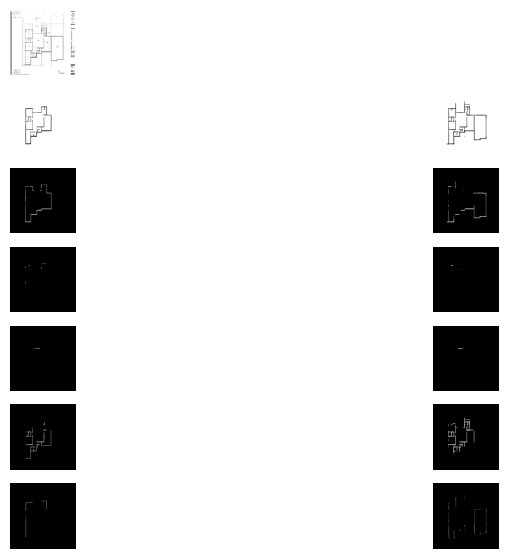

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 33/50 
Average Train Loss: 0.2886828742092633, IOU : 0.6334566881611817


100%|██████████| 15/15 [00:05<00:00,  2.67it/s]


Epoch 33/50 
Average val Loss: 0.3286848977208138, IOU : 0.5825673955182235


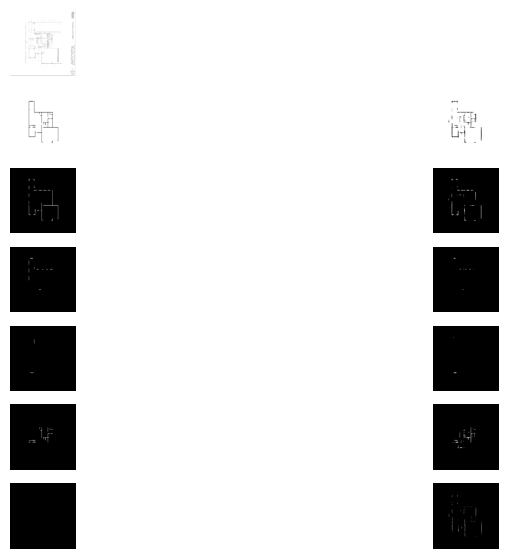

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 34/50 
Average Train Loss: 0.2867651980200593, IOU : 0.6345501440632457


100%|██████████| 15/15 [00:05<00:00,  2.55it/s]


Epoch 34/50 
Average val Loss: 0.29981256400545436, IOU : 0.6082441399494807


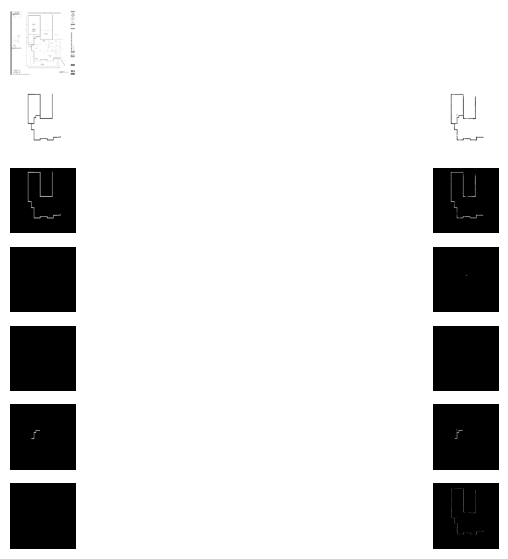

100%|██████████| 59/59 [00:25<00:00,  2.33it/s]


Epoch 35/50 
Average Train Loss: 0.28209677869177785, IOU : 0.6406239658215288


100%|██████████| 15/15 [00:06<00:00,  2.31it/s]


Epoch 35/50 
Average val Loss: 0.2978849994639556, IOU : 0.6106225629647573


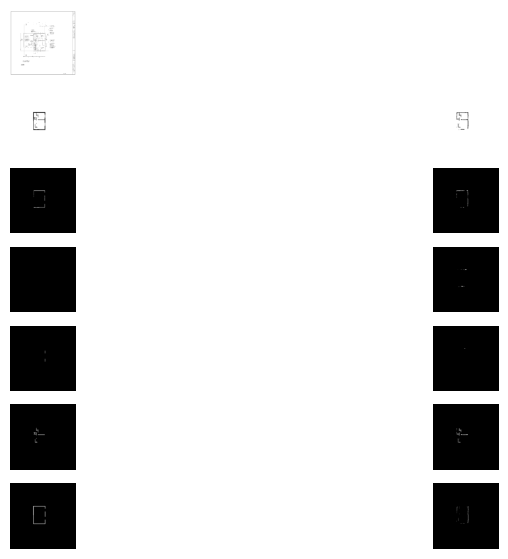

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 36/50 
Average Train Loss: 0.2734874072307089, IOU : 0.6479674191885012


100%|██████████| 15/15 [00:06<00:00,  2.45it/s]


Epoch 36/50 
Average val Loss: 0.2878996359805266, IOU : 0.6181478336453438


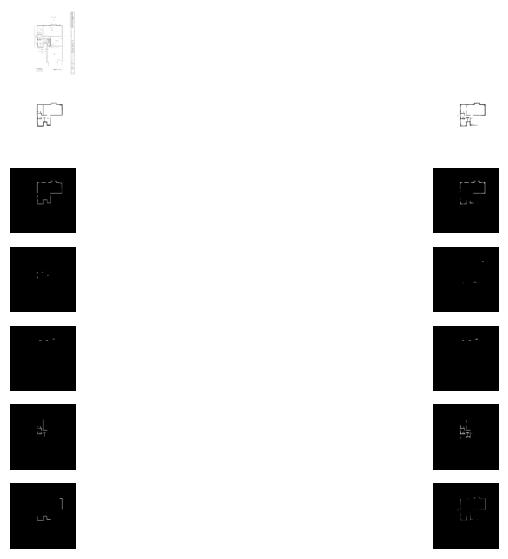

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 37/50 
Average Train Loss: 0.2756218606748192, IOU : 0.6457411469812742


100%|██████████| 15/15 [00:05<00:00,  2.65it/s]


Epoch 37/50 
Average val Loss: 0.27697727382183074, IOU : 0.6332532828052838


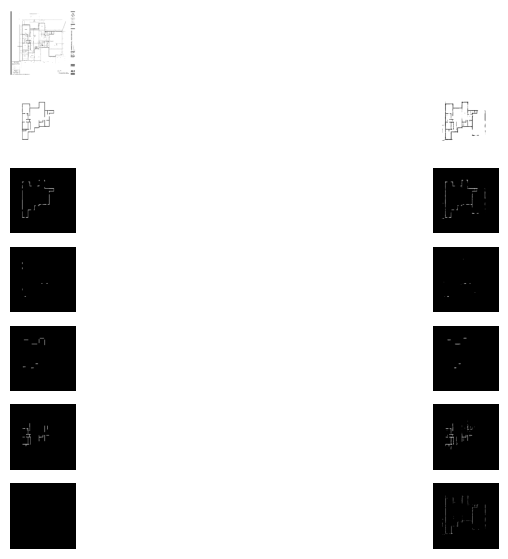

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 38/50 
Average Train Loss: 0.27303467174376345, IOU : 0.6474736708105874


100%|██████████| 15/15 [00:05<00:00,  2.62it/s]


Epoch 38/50 
Average val Loss: 0.30229570517937343, IOU : 0.6057324334979057


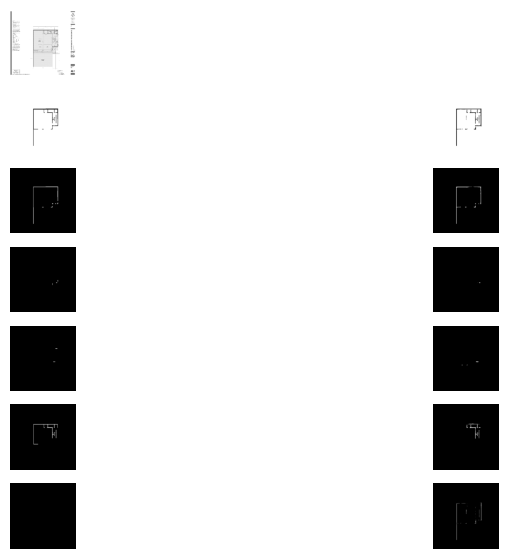

100%|██████████| 59/59 [00:25<00:00,  2.32it/s]


Epoch 39/50 
Average Train Loss: 0.2734111367322315, IOU : 0.6476272052209193


100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


Epoch 39/50 
Average val Loss: 0.2825621085862319, IOU : 0.6246508647998174


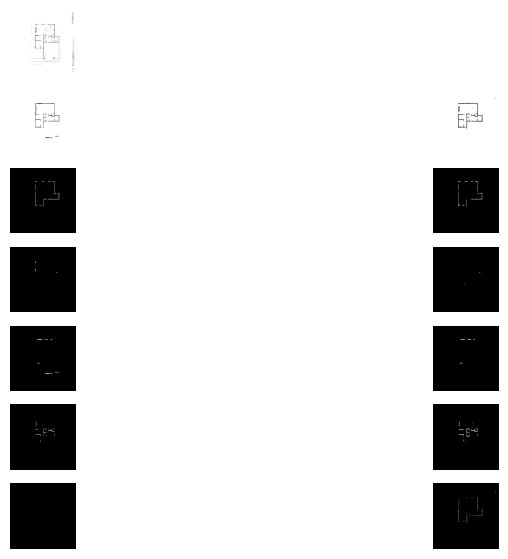

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 40/50 
Average Train Loss: 0.2622207890016074, IOU : 0.6588253223739754


100%|██████████| 15/15 [00:05<00:00,  2.62it/s]


Epoch 40/50 
Average val Loss: 0.2869159224132697, IOU : 0.6220916171868642


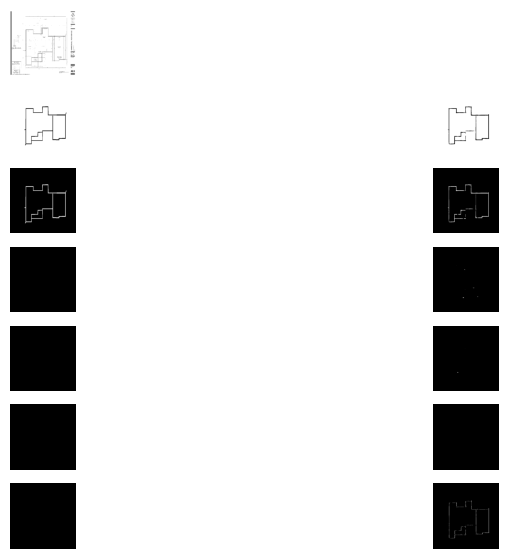

100%|██████████| 59/59 [00:26<00:00,  2.27it/s]


Epoch 41/50 
Average Train Loss: 0.2631643975204867, IOU : 0.6574439476875557


100%|██████████| 15/15 [00:05<00:00,  2.68it/s]


Epoch 41/50 
Average val Loss: 0.28376285210251806, IOU : 0.6238994712630908


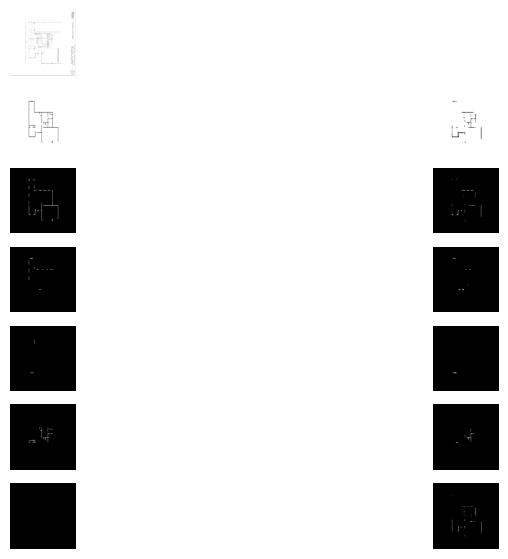

100%|██████████| 59/59 [00:26<00:00,  2.23it/s]


Epoch 42/50 
Average Train Loss: 0.24464871940771277, IOU : 0.6750723823107843


100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


Epoch 42/50 
Average val Loss: 0.26398577603201073, IOU : 0.6411566028992335


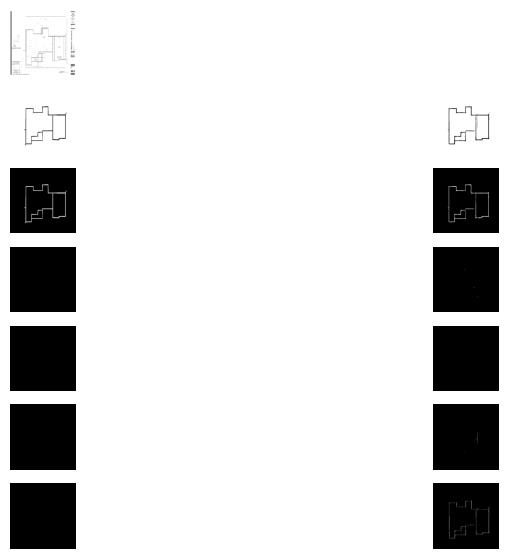

100%|██████████| 59/59 [00:26<00:00,  2.23it/s]


Epoch 43/50 
Average Train Loss: 0.2551279036126936, IOU : 0.6636292850204065


100%|██████████| 15/15 [00:06<00:00,  2.45it/s]


Epoch 43/50 
Average val Loss: 0.2609243497252464, IOU : 0.6445518602927526


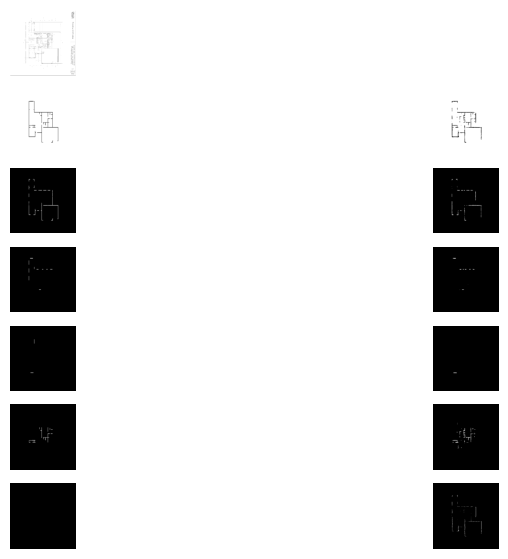

100%|██████████| 59/59 [00:25<00:00,  2.27it/s]


Epoch 44/50 
Average Train Loss: 0.25047748439187595, IOU : 0.6697268216689196


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]


Epoch 44/50 
Average val Loss: 0.2845696724951267, IOU : 0.6195578098297119


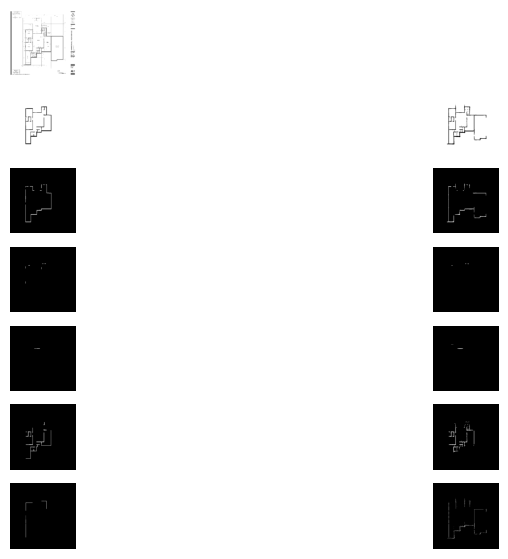

100%|██████████| 59/59 [00:25<00:00,  2.28it/s]


Epoch 45/50 
Average Train Loss: 0.26134081866978903, IOU : 0.6588739907661042


100%|██████████| 15/15 [00:05<00:00,  2.70it/s]


Epoch 45/50 
Average val Loss: 0.2546539212266604, IOU : 0.6518074835340182


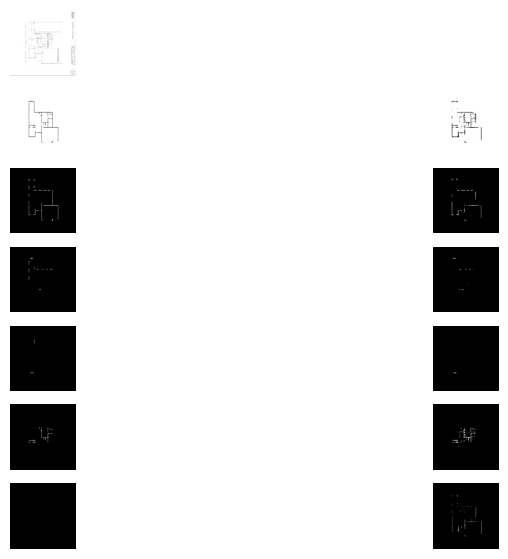

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 46/50 
Average Train Loss: 0.2409178663155664, IOU : 0.6782459533947


100%|██████████| 15/15 [00:05<00:00,  2.67it/s]


Epoch 46/50 
Average val Loss: 0.24927132576704025, IOU : 0.65704165995121


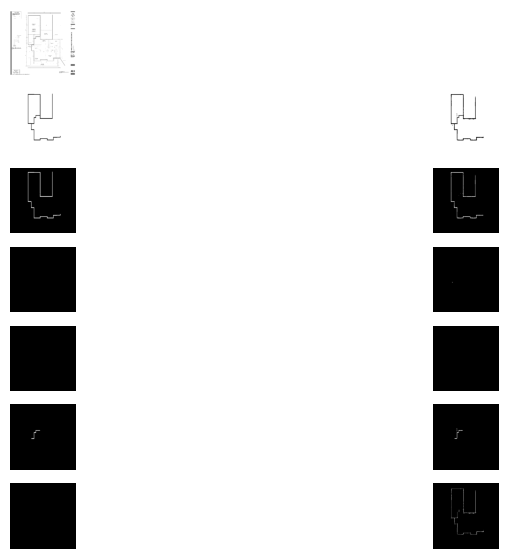

100%|██████████| 59/59 [00:25<00:00,  2.30it/s]


Epoch 47/50 
Average Train Loss: 0.23936074569631935, IOU : 0.6801363123320359


100%|██████████| 15/15 [00:06<00:00,  2.39it/s]


Epoch 47/50 
Average val Loss: 0.27013782287637395, IOU : 0.635816249748071


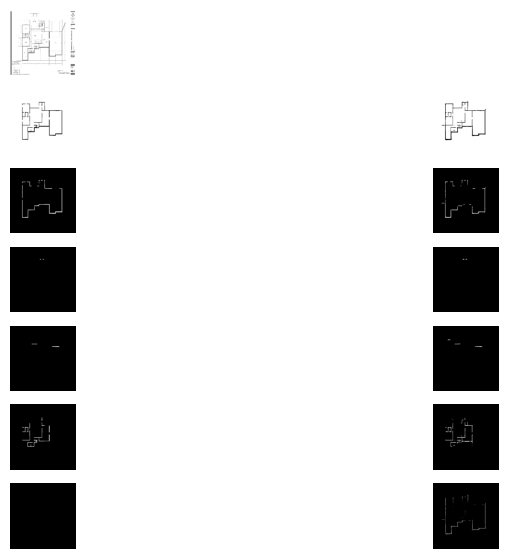

100%|██████████| 59/59 [00:26<00:00,  2.22it/s]


Epoch 48/50 
Average Train Loss: 0.2528537385662923, IOU : 0.667252373684324


100%|██████████| 15/15 [00:06<00:00,  2.41it/s]


Epoch 48/50 
Average val Loss: 0.2682043269276619, IOU : 0.6373774449030558


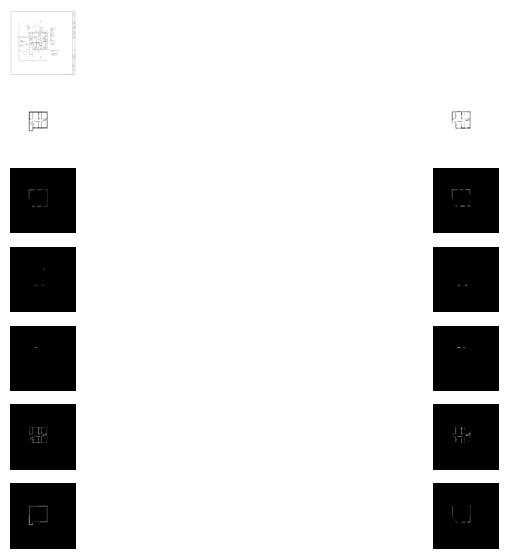

100%|██████████| 59/59 [00:25<00:00,  2.31it/s]


Epoch 49/50 
Average Train Loss: 0.2427328133509668, IOU : 0.6774961571209133


100%|██████████| 15/15 [00:05<00:00,  2.69it/s]


Epoch 49/50 
Average val Loss: 0.24339091603954632, IOU : 0.6622098873058955


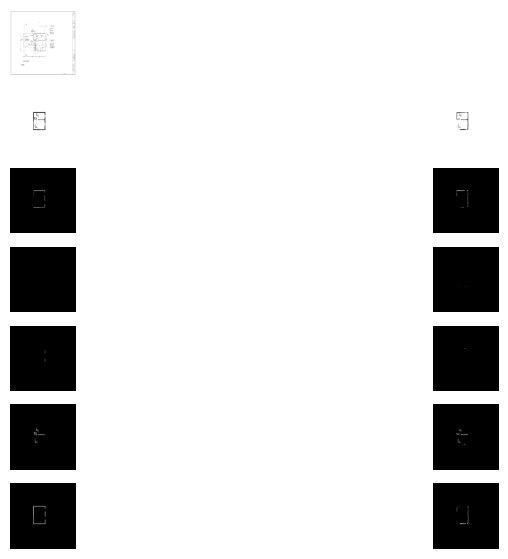

100%|██████████| 59/59 [00:26<00:00,  2.25it/s]


Epoch 50/50 
Average Train Loss: 0.24353168292910302, IOU : 0.6771722137572843


100%|██████████| 15/15 [00:05<00:00,  2.57it/s]


Epoch 50/50 
Average val Loss: 0.2418261135617892, IOU : 0.6657569035887718


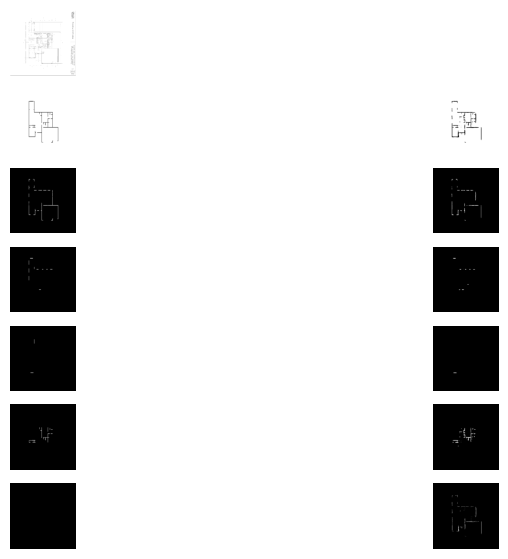

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

num_epochs = 50
model.train()
model = model.to(DEVICE)


for idx in range(num_epochs):
  model.train()
  running_total_loss = 0
  running_iou = 0
  for X,Y in tqdm(train_loader):
    X = X.to(DEVICE).to(torch.float32)
    Y = Y.to(DEVICE).to(torch.int64)
    X2 = torch.zeros((1, 3, 512, 512))
    X2[:,0,:,:] = X
    X2[:,1,:,:] = X
    X2[:,2,:,:] = X
    optimizer.zero_grad()
    Y_pred = model(X2.to(DEVICE))
    # print(X.shape, Y.shape, Y_pred.shape)
    total_loss = loss(Y_pred, Y)
    total_loss.backward()
    running_total_loss += total_loss.cpu().detach().numpy()
    running_iou += (1-metric(Y_pred, Y).cpu().detach().numpy())
    optimizer.step()

#             print(torch.max(stage_4), torch.max(kpts))
# Take the average loss across batches for the epoch

  num_batches = len(train_loader)
  average_loss = running_total_loss / num_batches
  avg_metric = running_iou / num_batches
  print(f"Epoch {idx+1}/{num_epochs} \nAverage Train Loss: {average_loss}, IOU : {avg_metric}")
  # print(X.shape, Y.shape, Y_pred.shape)

  model.eval()
  with torch.no_grad():
    running_total_loss = 0
    running_iou = 0
    for X,Y in tqdm(val_loader):
      X = X.to(DEVICE).to(torch.float32)
      Y = Y.to(DEVICE).to(torch.int64)
      X2 = torch.zeros((1, 3, 512, 512))
      X2[:,0,:,:] = X
      X2[:,1,:,:] = X
      X2[:,2,:,:] = X
      Y_pred = model(X2.to(DEVICE))
      # Y_pred = model(X)
      # print(X.shape, Y.shape, Y_pred.shape)
      total_loss = loss(Y_pred, Y)
      # total_loss.backward()
      running_total_loss += total_loss.cpu().detach().numpy()
      running_iou += (1-metric(Y_pred, Y).cpu().detach().numpy())
      # optimizer.step()

#             print(torch.max(stage_4), torch.max(kpts))
# Take the average loss across batches for the epoch

  num_batches = len(val_loader)
  average_loss = running_total_loss / num_batches
  avg_metric = running_iou / num_batches
  print(f"Epoch {idx+1}/{num_epochs} \nAverage val Loss: {average_loss}, IOU : {avg_metric}")


  I = X.cpu().detach().numpy()[0,:,:,:].transpose(1,2,0)
  S = Y.cpu().detach().numpy()[0,:,:,:].transpose(1,2,0)
  # print("shape : <", torch.argmax(torch.nn.functional.softmax(Y_pred, dim = 1), dim=1).shape)
  S_pred = torch.argmax(torch.nn.functional.softmax(Y_pred, dim = 1),dim=1).cpu().detach().numpy()[0,:,:]
  # print(I.shape, np.unique(S), np.unique(S_pred))

  figure = plt.figure(figsize=(10,7))

  figure.add_subplot(7,2,1)
  plt.imshow(I[:,:,:], cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,3)
  plt.imshow(np.where(S==0, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,4)
  plt.imshow(np.where(S_pred == 0, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,5)
  plt.imshow(np.where(S==1, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,6)
  plt.imshow(np.where(S_pred == 1, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,7)
  plt.imshow(np.where(S==2, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,8)
  plt.imshow(np.where(S_pred == 2, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,9)
  plt.imshow(np.where(S==3, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,10)
  plt.imshow(np.where(S_pred == 3, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,11)
  plt.imshow(np.where(S==4, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,12)
  plt.imshow(np.where(S_pred == 4, 255, 0), cmap="gray")
  plt.axis("off")

  figure.add_subplot(7,2,13)
  plt.imshow(np.where(S==5, 255, 0), cmap="gray")
  plt.axis("off")
  figure.add_subplot(7,2,14)
  plt.imshow(np.where(S_pred == 5, 255, 0), cmap="gray")
  plt.axis("off")
  plt.show()
  plt.close()
  # print(Y_pred.shape, Y.shape)



 Dice Score : 0.76, mIOU score : 0.66